In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from __future__ import division

import os

import numpy as np
from glob import glob

import reduce_dblspec 
import pipeline

from astropy.io import fits
from astropy import units as u
from astropy import modeling
from astropy.table import Table
from astropy.modeling import models, fitting

from astropy import constants as cnst
from matplotlib import pyplot as plt
from photutils import centroid_com
from astropy import constants as const
import pandas as pd
import math as m
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from astropy import constants as const
from astropy.stats import sigma_clip
from astropy.modeling.models import custom_model
from astropy.modeling.fitting import LevMarLSQFitter


from astropy.visualization import quantity_support
quantity_support() #not sure about this line but stackoverflow...try w/o it later

from matplotlib import pyplot as plt

In [2]:
#amending pipeline code to get sky subtraction separate from 1d spec

def sky_subtract2D(comb,skyaps,model):    
    #plotting 2D to get skyaps right around the target
    plt.figure(figsize=(10,25)) #setting up fig size
    value = model[1]
    if model == 'linear':
        subimg, models = comb.subtract_sky(skyaps, skymodel=modeling.models.Linear1D(1,0)) #(1,0)
    elif model == ('poly',value):
        subimg, models = comb.subtract_sky(skyaps, skymodel=modeling.models.Polynomial1D(value)) #Linear1D(1/10,10)) #(1,0)
    elif model == ('combined',value):
        mymodel=(modeling.models.Polynomial1D(value) + modeling.models.Linear1D(1,0))
        subimg, models = comb.subtract_sky(skyaps, skymodel=mymodel)
    elif model == None:
        subimg, models = comb.subtract_sky(skyaps, skymodel=None)#subtracts mean
    else:
        print ("Model type or polynomial degree not recognized")
    return (subimg, comb, models)    #subtracted2D, original, fitted models per row




## this notebook is to reduce data taken on night ending November 8, 2015

# Dispersion Solutions
### RED 1.5"

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


used atlas plot limits for Red side


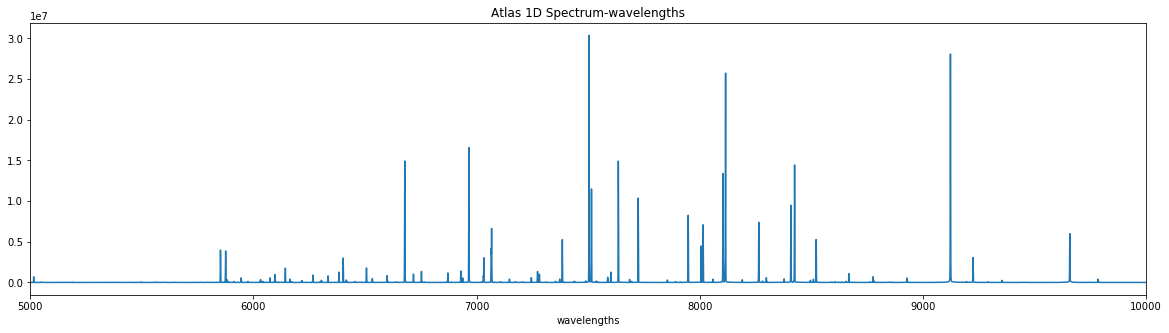

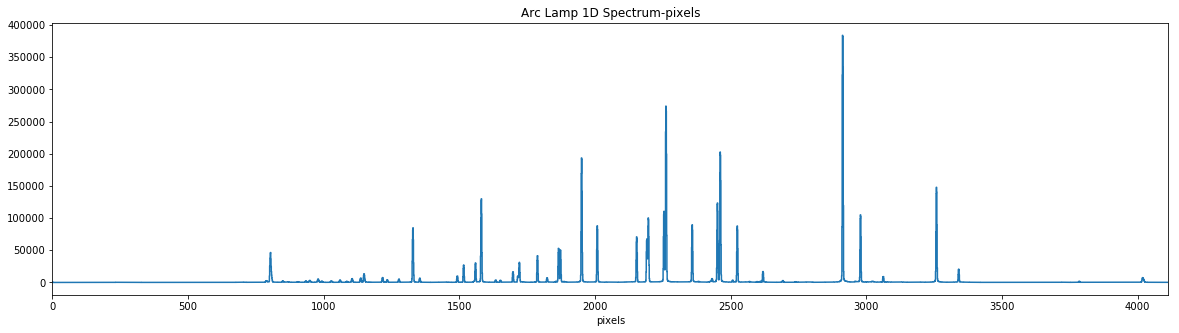

In [3]:
#generating atlas & arc graphs for wl & pixel matching

#nameing all the datafiles needed
all_side_files_red15 = 'DoubleSpec/20151108/red*.fits' #redside
atlasfiles_red15 = fits.open('henear.fits') #NOAO atlas #redside
arcfiles_red15 = 'DoubleSpec/20151108/red0015.fits' #redside
linelist_red15 = reduce_dblspec.HENEAR_LINE_LIST #must be in this form cant use'henearhres.dat'-debug later
flatid = 'DomeFlats 1p5'

#naming pipeline output for guess_plot use
specset_red15 = pipeline.dispersion(all_side_files_red15, atlasfiles_red15, arcfiles_red15, linelist_red15,flatid)

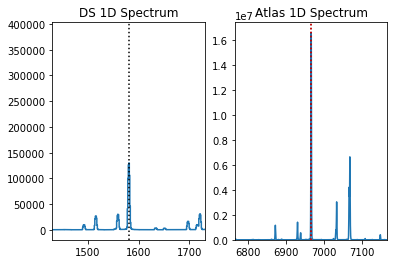

In [4]:
#collecting guesses of matching lines from above graphs

#entering (px,wl)guesses & data
pipeline.guess_plot(1580,6965.43,specset_red15) #outputs (pixel guess, nearest wl/id in linelist)


#collect those guesses here ~5 seems good
pixel_guesses_red15 = [3256,2911,2260,1949] #,1580]
atlas_lines_red15 = [9657.78,9122.9674,8115.31,7635.1]#,6965.43]
guesses_red15 = list(zip(pixel_guesses_red15, atlas_lines_red15)) #making tuples to pass into fcn later

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


chose ds for redside
chose guesses for redside
Skipping line HeI at wl=3187.745 - out of wl min/max
Skipping line ArII at wl=3307.2283 - out of wl min/max
Skipping line ArI at wl=3319.3446 - out of wl min/max
Skipping line ArII at wl=3350.9243 - out of wl min/max
Skipping line HeI at wl=3354.55 - out of wl min/max
Skipping line ArI at wl=3373.4823 - out of wl min/max
Skipping line ArII at wl=3376.4359 - out of wl min/max
Skipping line ArII at wl=3388.5309 - out of wl min/max
Skipping line NeII at wl=3397.866 - out of wl min/max
Skipping line ArI at wl=3406.1804 - out of wl min/max
Skipping line ArII at wl=3414.4583 - out of wl min/max
Skipping line NeI at wl=3417.9035 - out of wl min/max
Skipping line ArII at wl=3421.6107 - out of wl min/max
Skipping line ArII at wl=3454.0952 - out of wl min/max
Skipping line ArII at wl=3464.1272 - out of wl min/max
Skipping line NeI at wl=3472.5711 - out of wl min/max
Skipping line ArII at wl=3476.7474 - out of wl min/max
Skipping line ArII at wl=3480

Found line ArI at wl=7948.1764
Clipped 0 lines
Failed to find line ArI at wl=8006.1567: "Guessed line's peak to base ratio is 2.594319909994525, which is less than 10"
Failed to find line ArI at wl=8014.7857: "Guessed line's peak to base ratio is 4.666815392546264, which is less than 10"
Failed to find line KrI at wl=8059.5038: "Guessed line's peak to base ratio is 1.012661498818794, which is less than 10"
Failed to find line ArI at wl=8103.6931: "Guessed line's peak to base ratio is 9.215290859022419, which is less than 10"
Found line ArI at wl=8115.311
Clipped 0 lines
Failed to find line KrI at wl=8190.0543: "Guessed line's peak to base ratio is 0.9940753013440363, which is less than 10"
Found line ArI at wl=8264.5225
Clipped 0 lines
Failed to find line KrI at wl=8281.0495: "Guessed line's peak to base ratio is 1.0152148399252718, which is less than 10"
Failed to find line NeI at wl=8377.6065: "Guessed line's peak to base ratio is 4.482837254937743, which is less than 10"
Found line 

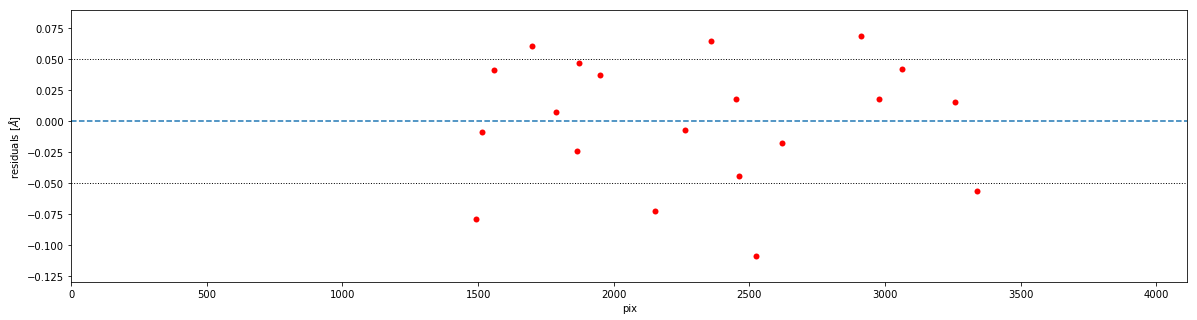

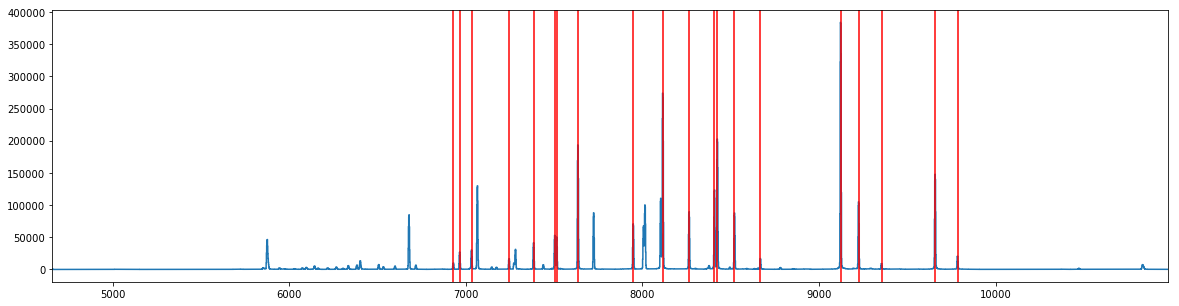

In [5]:
#generating more line matches based on guesses above and checking residuals to see if this is a good enough solution

ds_red15 = pipeline.goodness_of_matches(arcfiles_red15,guesses_red15,all_side_files_red15,atlasfiles_red15,linelist_red15,flatid)

## Red 1.0"

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


used atlas plot limits for Red side


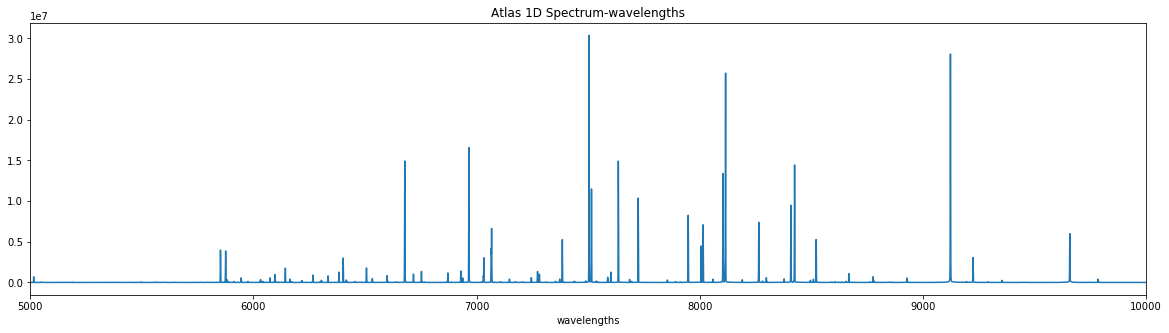

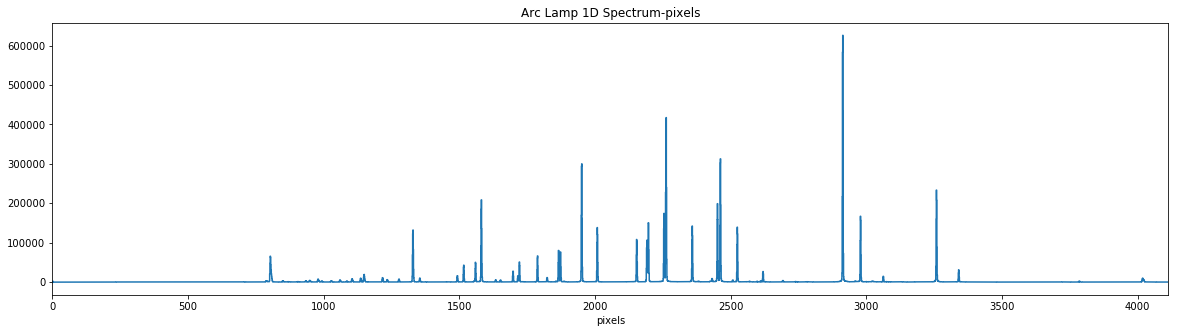

In [6]:
#nameing all the datafiles needed
all_side_files_red10 = 'DoubleSpec/20151108/red*.fits' #redside
atlasfiles_red10 = fits.open('henear.fits') #NOAO atlas #redside
arcfiles_red10 = 'DoubleSpec/20151108/red0012.fits' #redside
linelist_red10 = reduce_dblspec.HENEAR_LINE_LIST
flatid = 'DomeFlats 1p0'

specset_red10 = pipeline.dispersion(all_side_files_red10, atlasfiles_red10, arcfiles_red10, linelist_red10,flatid)

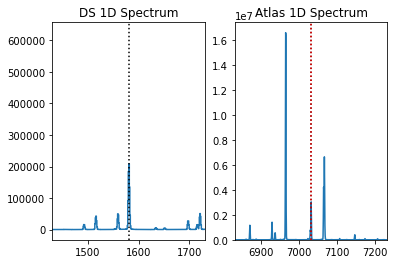

In [7]:
#collecting guesses of matching lines from above graphs

#entering(px,wl)guesses & data
pipeline.guess_plot(1580,7032.4131,specset_red10) #outputs (pixel guess, nearest wl/id in linelist)

#collect guesses here ~5 seems good
pixel_guesses_red10 = [2911,2260,1949,3256]#,1580]
atlas_lines_red10 = [9122.9674,8115.311,7635.106,9657.7863]#,7032.4131,]
guesses_red10 = list(zip(pixel_guesses_red10, atlas_lines_red10)) #making tuples to pass into fcn later

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


chose ds for redside
chose guesses for redside
Skipping line HeI at wl=3187.745 - out of wl min/max
Skipping line ArII at wl=3307.2283 - out of wl min/max
Skipping line ArI at wl=3319.3446 - out of wl min/max
Skipping line ArII at wl=3350.9243 - out of wl min/max
Skipping line HeI at wl=3354.55 - out of wl min/max
Skipping line ArI at wl=3373.4823 - out of wl min/max
Skipping line ArII at wl=3376.4359 - out of wl min/max
Skipping line ArII at wl=3388.5309 - out of wl min/max
Skipping line NeII at wl=3397.866 - out of wl min/max
Skipping line ArI at wl=3406.1804 - out of wl min/max
Skipping line ArII at wl=3414.4583 - out of wl min/max
Skipping line NeI at wl=3417.9035 - out of wl min/max
Skipping line ArII at wl=3421.6107 - out of wl min/max
Skipping line ArII at wl=3454.0952 - out of wl min/max
Skipping line ArII at wl=3464.1272 - out of wl min/max
Skipping line NeI at wl=3472.5711 - out of wl min/max
Skipping line ArII at wl=3476.7474 - out of wl min/max
Skipping line ArII at wl=3480

Failed to find line ArI at wl=8006.1567: "Guessed line's peak to base ratio is 7.095376065795912, which is less than 10"
Failed to find line ArI at wl=8014.7857: "Guessed line's peak to base ratio is 5.811893417670786, which is less than 10"
Failed to find line KrI at wl=8059.5038: "Guessed line's peak to base ratio is 1.032785285130671, which is less than 10"
Found line ArI at wl=8103.6931
Clipped 0 lines
Found line ArI at wl=8115.311
Clipped 0 lines
Failed to find line KrI at wl=8190.0543: "Guessed line's peak to base ratio is 1.0636024844546064, which is less than 10"
Found line ArI at wl=8264.5225
Clipped 0 lines
Failed to find line KrI at wl=8281.0495: "Tried to find peak at 2368.6963178083356 but it's in a valley, not a peak"
Failed to find line NeI at wl=8377.6065: "Guessed line's peak to base ratio is 5.187375208436419, which is less than 10"
Found line ArI at wl=8408.2096
Clipped 0 lines
Found line ArI at wl=8424.6475
Clipped 0 lines
Failed to find line NeI at wl=8495.3598: "G

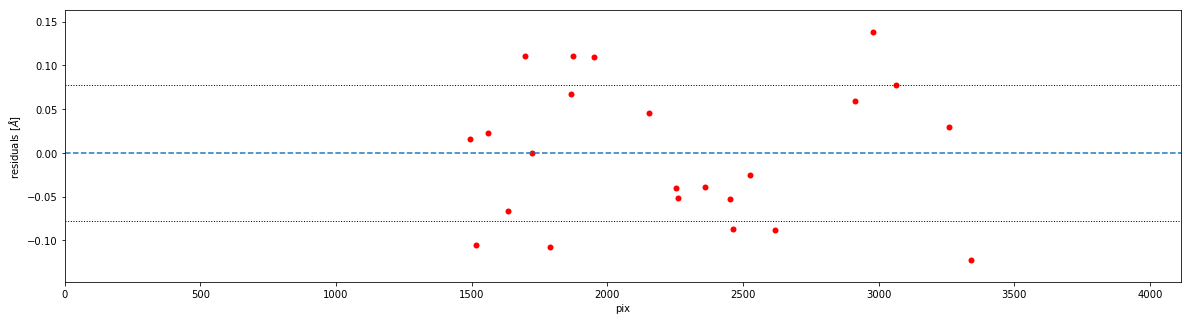

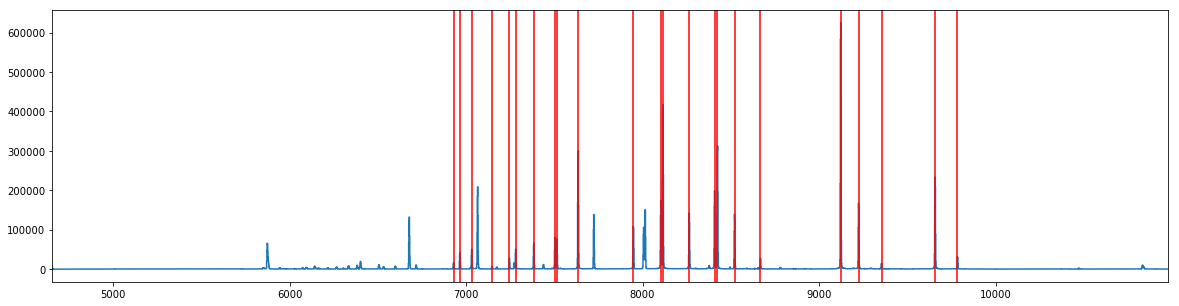

In [8]:
#generating more line matches based on guesses above and checking residuals to see if this is a good enough solution

ds_red10 = pipeline.goodness_of_matches(arcfiles_red10,guesses_red10,all_side_files_red10,atlasfiles_red10,linelist_red10,flatid)

## Blue 1.5"

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


used atlas plot limits for Blue side


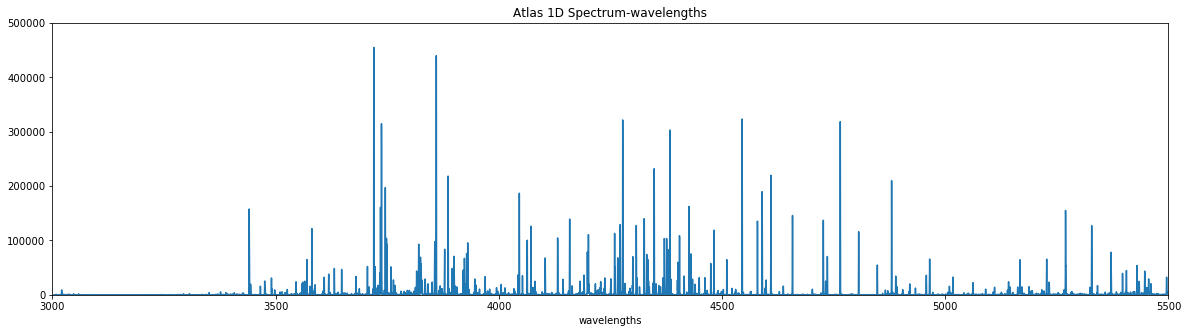

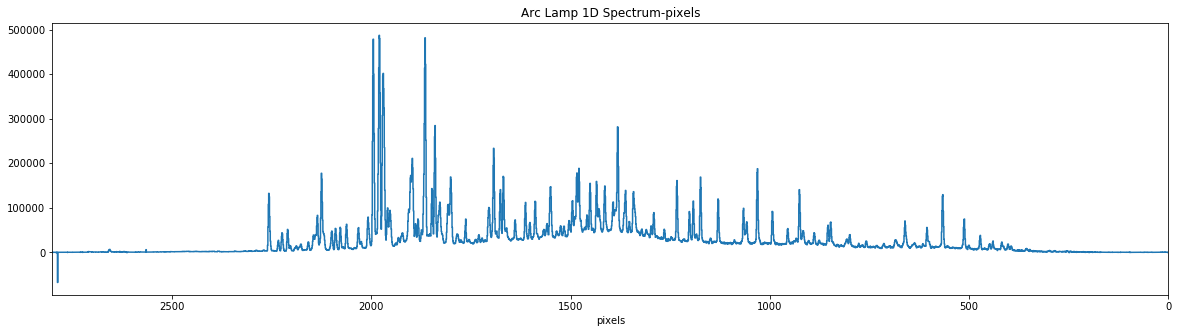

In [9]:
all_side_files_blue15 = 'DoubleSpec/20151108/blue*.fits' #blueside
atlasfiles_blue15 = fits.open('fear.fits') #NOAO atlas #blueside
arcfiles_blue15 = 'DoubleSpec/20151108/blue0015.fits' #blueside
linelist_blue15 = reduce_dblspec.FEAR_LINE_LIST #must be in this form cant use'fear.dat'--debug later
flatid = 'DomeFlats 1p5'

specset_blue15 = pipeline.dispersion(all_side_files_blue15, atlasfiles_blue15, arcfiles_blue15, linelist_blue15,flatid)

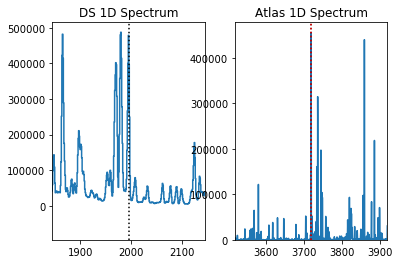

In [10]:
pipeline.guess_plot(1995,3719.9346,specset_blue15) #(px,wl)

#collect guesses here but comment them out to see output of matches from line above
pixel_guesses_blue15 = [565,1031,1693,1995,2123]
atlas_lines_blue15 = [5269.5366,4764.8646,4044.4179,3719.9346,3581.1925] 

guesses_blue15 = list(zip(pixel_guesses_blue15, atlas_lines_blue15)) #making tuples to pass into fcn later

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


chose ds for blueside
chose guesses for blueside
Failed to find line FeI at wl=3020.6391: "Tried to find peak at 2663.2916383866764 but it's in a valley, not a peak"
Failed to find line FeI at wl=3024.0325: "Guessed line's peak to base ratio is 4.801754679050734, which is less than 5"
Failed to find line FeI at wl=3037.3887: "Guessed line's peak to base ratio is 0.8594691113728206, which is less than 5"
Failed to find line FeI at wl=3047.6043: "Guessed line's peak to base ratio is 1.045314598773046, which is less than 5"
Failed to find line FeI at wl=3057.4456: "Tried to find peak at 2627.2402746039243 but it's in a valley, not a peak"
Failed to find line FeI at wl=3059.0856: "Tried to find peak at 2625.636716554663 but it's in a valley, not a peak"
Failed to find line FeI at wl=3225.785: "Tried to find peak at 2463.8082864049584 but it's in a valley, not a peak"
Failed to find line ArII at wl=3243.6887: "Tried to find peak at 2446.557233345804 but it's in a valley, not a peak"
Failed 

Failed to find line FeI at wl=4005.2414: "Guessed line's peak to base ratio is 2.7349867375801433, which is less than 5"
Failed to find line ArII at wl=4033.8093: "Guessed line's peak to base ratio is 3.5369394758664634, which is less than 5"
Found line ArII at wl=4042.8937
Clipped 0 lines
Found line ArI at wl=4044.4179
Clipped 0 lines
Found line FeI at wl=4045.813
Clipped 0 lines
Failed to find line ArII at wl=4052.9208: "Guessed line's peak to base ratio is 1.5821632888663304, which is less than 5"
Found line FeI at wl=4063.5939
Clipped 0 lines
Failed to find line ArII at wl=4103.9121: "Guessed line's peak to base ratio is 4.090651488912345, which is less than 5"
Failed to find line FeI at wl=4118.5442: "Guessed line's peak to base ratio is 1.641562603797535, which is less than 5"
Failed to find line ArII at wl=4131.7235: "Guessed line's peak to base ratio is 4.7765852026794064, which is less than 5"
Failed to find line FeI at wl=4143.8688: "Guessed line's peak to base ratio is 4.118

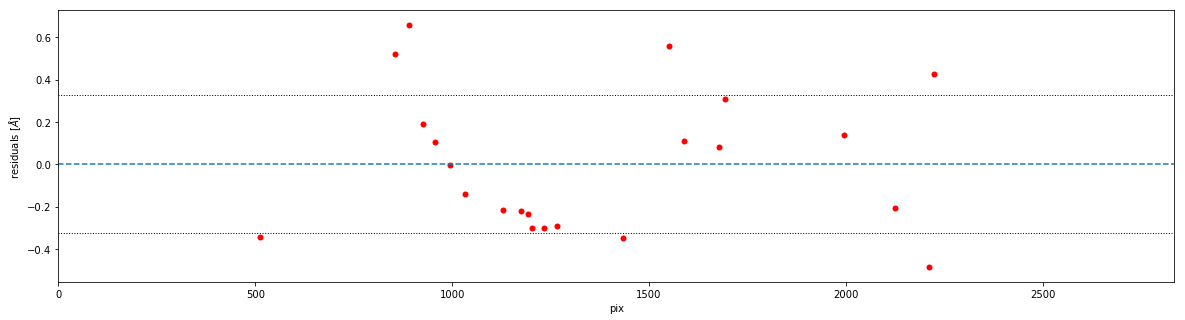

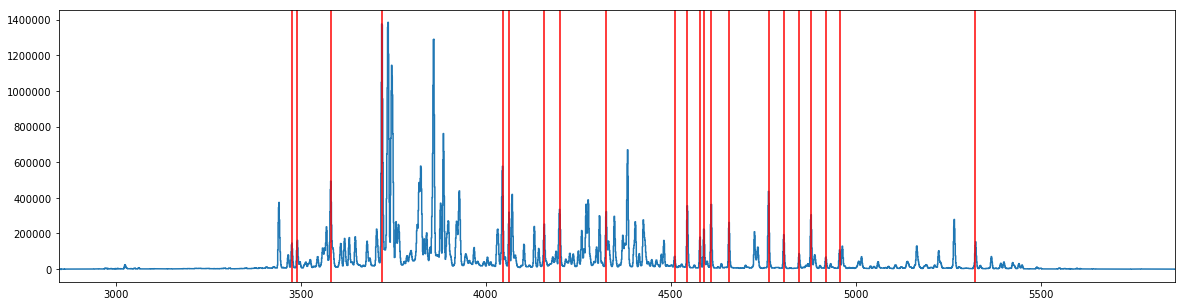

In [11]:
#generating more line matches based on guesses above and checking residuals to see if this is a good enough solution


#did a ds for this one only but residuals in 2000s are bad....redo

ds_blue15 = pipeline.goodness_of_matches(arcfiles_blue15,guesses_blue15,all_side_files_blue15,atlasfiles_blue15,linelist_blue15,flatid) #yay looks good FINALLY!!

## Blue 1.0"

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


used atlas plot limits for Blue side


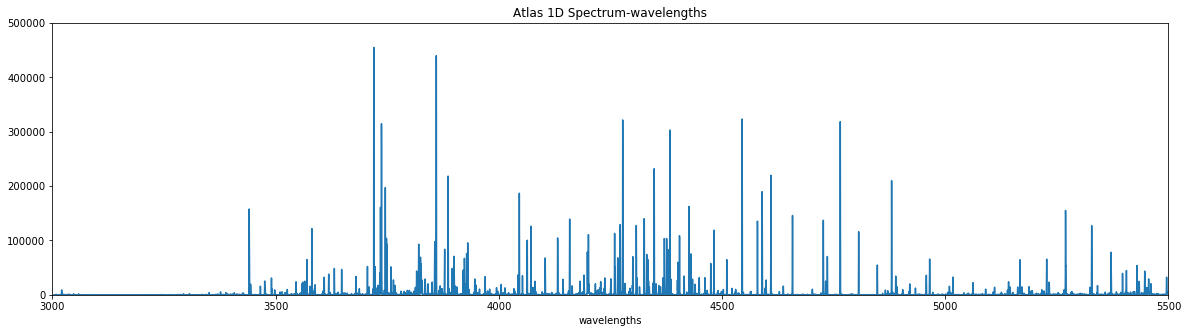

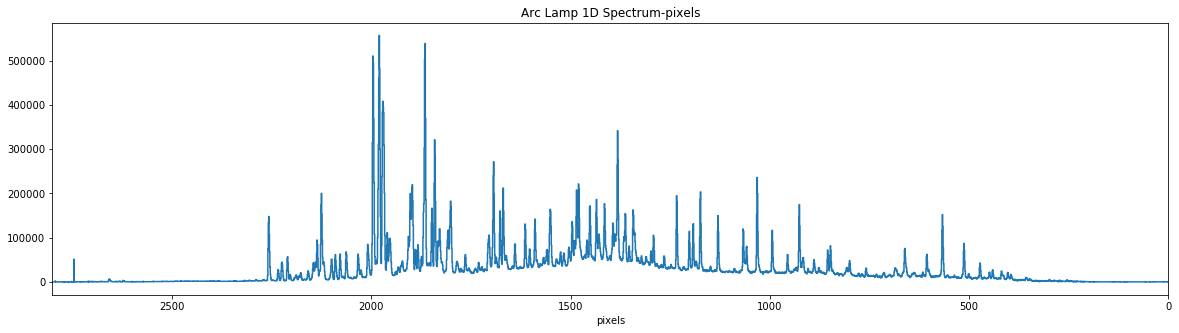

In [12]:
all_side_files_blue10 = 'DoubleSpec/20151108/blue*.fits' #blueside
atlasfiles_blue10 = fits.open('fear.fits') #NOAO atlas #blueside
arcfiles_blue10 = 'DoubleSpec/20151108/blue0012.fits' #blueside
linelist_blue10 = reduce_dblspec.FEAR_LINE_LIST #must be in this form cant use'fear.dat'--debug later
flatid = 'DomeFlats 1p0'

specset_blue10 = pipeline.dispersion(all_side_files_blue10, atlasfiles_blue10, arcfiles_blue10, linelist_blue10,flatid)

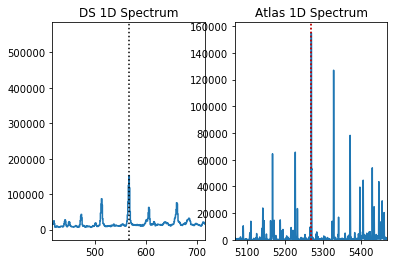

In [13]:
pipeline.guess_plot(566,5269,specset_blue10) #(px,wl)

#collect guesses here but comment them out to see output of matches from line above
pixel_guesses_blue10 = [566,1031,2125,1995] #,1657
atlas_lines_blue10 = [5269.5366,4764.8646,3581.1925,3719.9346] #,4045.8130

guesses_blue10 = list(zip(pixel_guesses_blue10, atlas_lines_blue10)) #making tuples to pass into fcn later

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


chose ds for blueside
chose guesses for blueside
Failed to find line FeI at wl=3020.6391: "Guessed line's peak to base ratio is 4.342313423417074, which is less than 5"
Failed to find line FeI at wl=3024.0325: "Guessed line's peak to base ratio is 4.342313423417074, which is less than 5"
Failed to find line FeI at wl=3037.3887: "Guessed line's peak to base ratio is 2.2865683295662476, which is less than 5"
Failed to find line FeI at wl=3047.6043: "Guessed line's peak to base ratio is 4.1554542934611325, which is less than 5"
Failed to find line FeI at wl=3057.4456: "Guessed line's peak to base ratio is 2.530395515752374, which is less than 5"
Failed to find line FeI at wl=3059.0856: "Guessed line's peak to base ratio is 2.530395515752374, which is less than 5"
Failed to find line FeI at wl=3225.785: "Guessed line's peak to base ratio is 1.4249739084863702, which is less than 5"
Failed to find line ArII at wl=3243.6887: "Guessed line's peak to base ratio is 1.1708172486579012, which is 

Failed to find line ArII at wl=3994.7918: "Guessed line's peak to base ratio is 2.1694436382857627, which is less than 5"
Failed to find line FeI at wl=4005.2414: "Guessed line's peak to base ratio is 3.4256574923628476, which is less than 5"
Failed to find line ArII at wl=4033.8093: "Guessed line's peak to base ratio is 4.81366604098211, which is less than 5"
Found line ArII at wl=4042.8937
Clipped 0 lines
Found line ArI at wl=4044.4179
Clipped 0 lines
Found line FeI at wl=4045.813
Clipped 0 lines
Failed to find line ArII at wl=4052.9208: "Guessed line's peak to base ratio is 1.7650387084642403, which is less than 5"
Found line FeI at wl=4063.5939
Clipped 0 lines
Found line ArII at wl=4103.9121
Clipped 0 lines
Failed to find line FeI at wl=4118.5442: "Guessed line's peak to base ratio is 1.766001548818575, which is less than 5"
Found line ArII at wl=4131.7235
Clipped 0 lines
Found line FeI at wl=4143.8688
Clipped 0 lines
Failed to find line ArI at wl=4158.5905: "Guessed line's peak to

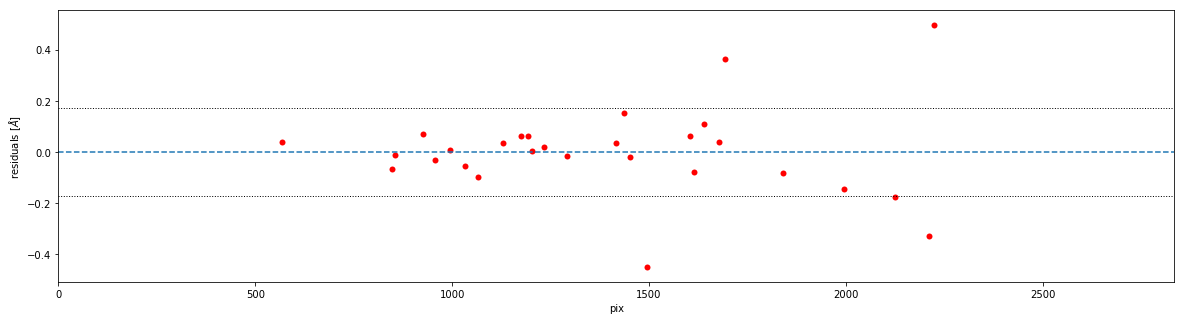

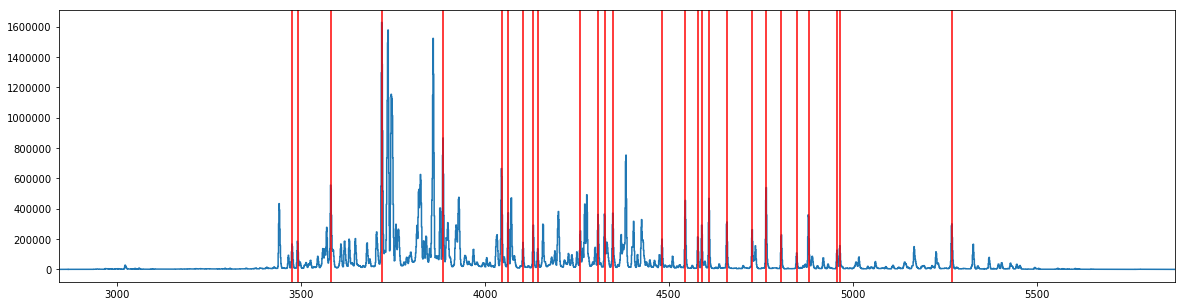

In [14]:
#generating more line matches based on guesses above and checking residuals to see if this is a good enough solution

#residuals only ok here, could try redo


ds_blue10 = pipeline.goodness_of_matches(arcfiles_blue10,guesses_blue10,all_side_files_blue10,atlasfiles_blue10,linelist_blue10,flatid) #yay looks good FINALLY!!

## Standard Star Reduction

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


4 target files located
choose 2D spec for redside
choose 1D target spec axis limits for redside


(4600, 11000)

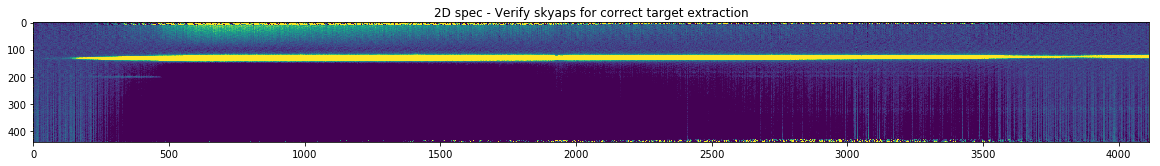

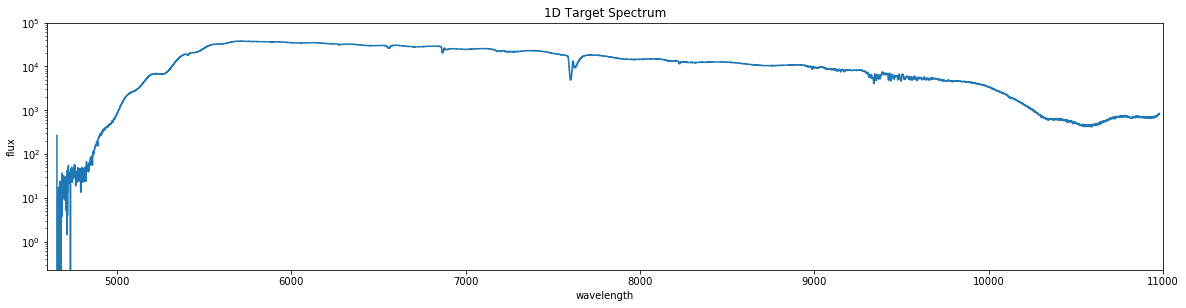

In [15]:
# BD +284211 frames64-65 for 1.0"

targetID_red10 = 'BD_28_4211'
skyaps_red10 = [(80,110),(145,150)] #works with poly3 #[(50,115),(160,400)]
all_side_files_target='DoubleSpec/20151108/red*.fits'
flatid='DomeFlats 1p0'
specaps=(120,140)#(115,180)
vmax=40
vmin=-10
#model=('poly',3)#'linear'
model=('linear')
flux_red10_BDSS,unc,comb = pipeline.sky_subtract(targetID_red10,skyaps_red10,ds_red10,all_side_files_red10,atlasfiles_red10,all_side_files_target,flatid,specaps,vmax,vmin,model)
#plt.ylim(0,10**20)
##plt.ylim(0,4000)
#plt.ylim(0,100000000000000000000) #10**20 is the min for bad, even **19.9 was ok
#plt.xlim(4500,11000) #consider chopping crazy edges up to 5,000 min
plt.yscale('log') #to match eso spec and b/c so bright 
plt.ylim(0,100000)
plt.xlim(4600,11000)

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


4 target files located


choose 2D spec for blueside
choose 1D target spec axis limits for blueside


(2700, 6000)

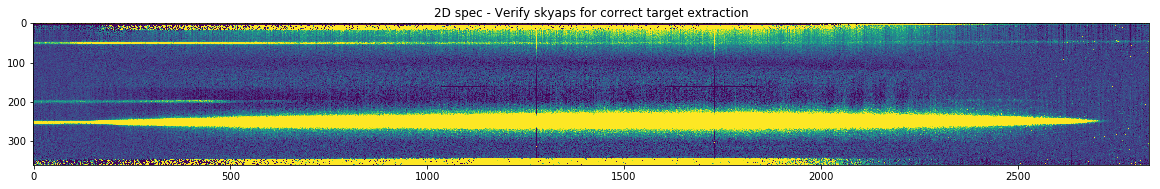

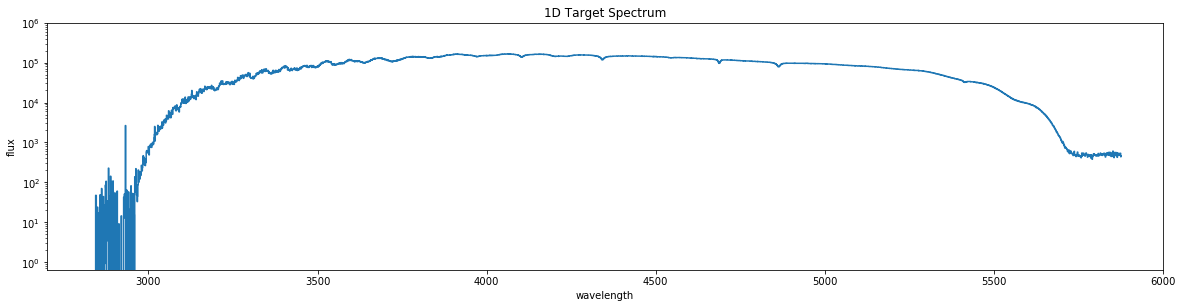

In [16]:
targetID_blue10 = 'BD_28_4211'
skyaps_blue10 = [(75,140),(300,340)]#[(80,110),(145,150)] #works with poly3 #[(50,115),(160,400)]
all_side_files_target='DoubleSpec/20151108/blue*.fits'
flatid='DomeFlats 1p0'
specaps=(245,280)#(120,140)#(115,180)
vmax=40
vmin=-10
model=('poly',2)#'linear'
#model=('linear')
flux_blue10_BDSS,unc,comb = pipeline.sky_subtract(targetID_blue10,skyaps_blue10,ds_blue10,all_side_files_blue10,atlasfiles_blue10,all_side_files_target,flatid,specaps,vmax,vmin,model)
#plt.ylim(0,10**20)
##plt.ylim(0,4000)
#plt.ylim(0,100000000000000000000) #10**20 is the min for bad, even **19.9 was ok
#plt.xlim(4500,11000) #consider chopping crazy edges up to 5,000 min
plt.yscale('log') #to match eso spec and b/c so bright 
plt.ylim(0,1000000)
plt.xlim(2700,6000)

In [17]:
#Left off trying to rid left edge above of oversubtraction and then need to combine r/b and
#compare to eso spec graph for flux adjustment...get here fast and slack eric

this is the complete 1D flux array:
heavy oversubtraction on blue edge


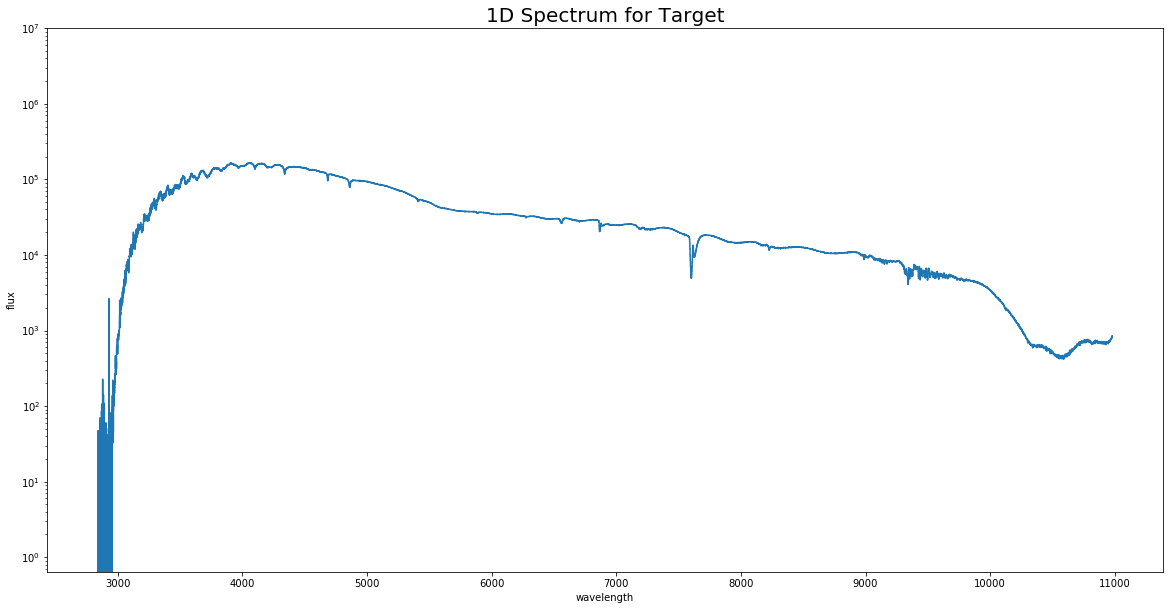

In [18]:
plt.figure(figsize=(20,10))
SStar=pipeline.combine_red_blue(ds_red10,ds_blue10,flux_red10_BDSS,flux_blue10_BDSS)
plt.yscale('log')
plt.ylim(0,10000000)
print('heavy oversubtraction on blue edge')
plt.title('1D Spectrum for Target',fontsize=20)

In [19]:
#ignore -bad attempts at opening eso ss data

##t=fits.open("fbd28d4211.dat","r")
##t.readlines()
#t=open("aaareadme.hst",'r')
#t[0].header
##with open('fbd28d4211.dat') as f:
##    [line.split()[1] for line in f]


#SStar=list(generate_values_for_filename("fbd28d4211.dat")) #from fcn used in saga spreadsheet
#ss_wl_1=np.array(SStar[7:76:17])
#ss_wl_2=np.array(SStar[76:89932:16])
#ss_wl_1=np.array(SStar[7:76:17])

#ss_wl=
#ss_flux_ergs=np.array(SStar[12::17])
#ss_flux_mjy=np.array(SStar[17::17])
#sstar_table = Table([ss_wl, ss_flux_ergs, ss_flux_mjy], names=('wl','flux-ergs','flux-mjy'))

#sstar_table
#print('messing up b/c based on wl values theres more/less blank spaces btwn to count')

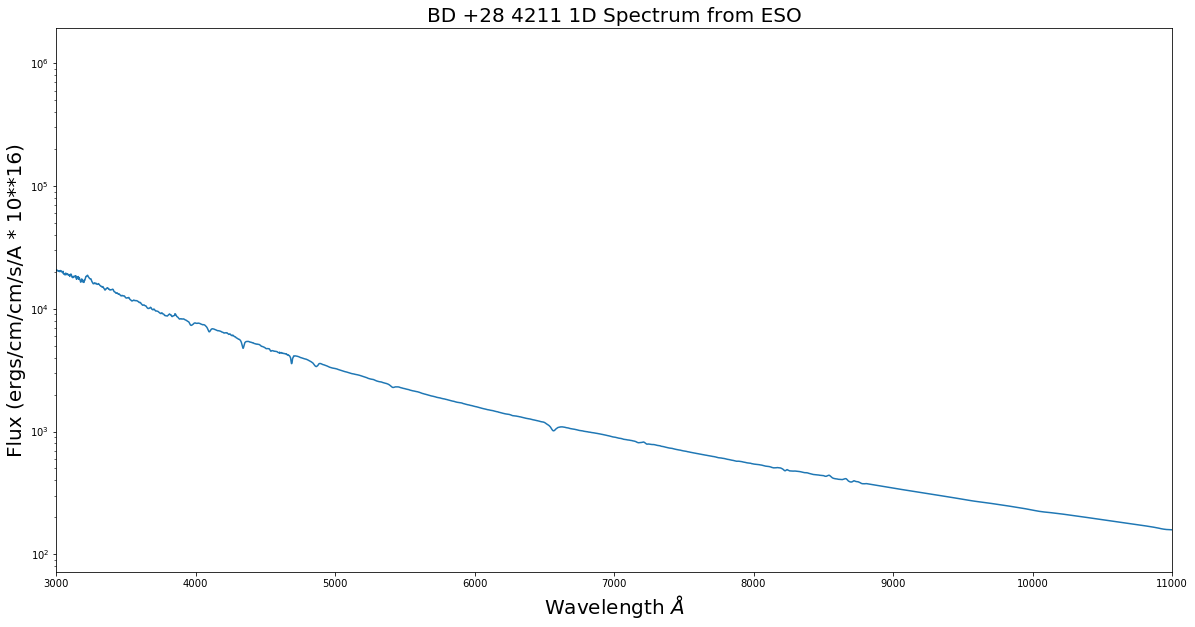

In [20]:
#opening ESO standard to compare flux values
#fbd28d4211.dat flux values for bd284211  
##The 'f' files list wavelength ( A ), flux ( ergs/cm/cm/s/A * 10**16 )and flux ( milli-Jy ) and bin (A)
#only 3 columns of data, last 'bin' column doesnt appear to be there
#mbd28d4211.dat wl values for bd284211
##The 'm' files list wavelength ( A ), AB magnitude and bin (A)

file = open('fbd28d4211.dat')
lst = []
for line in file:
    lst += [line.split()]
##print(lst[0::])
data=[]
mylist=np.array(lst)
for row in mylist:
    for i in row:
        data.append(i)
        #print(i)
#print(data) #this looks correct, one list all data values
ss_wl=np.array(data[0::3],dtype='f')
ss_flux_ergs=np.array(data[1::3],dtype='f')
ss_flux_mjy=np.array(data[2::3],dtype='f')
sstar_table=Table([ss_wl, ss_flux_ergs, ss_flux_mjy], names=('wl','flux-ergs','flux-mjy'))
#sstar_table #GOOD

#print(len(ss_wl)) #5105
plt.figure(figsize=(20,10))
plt.plot(sstar_table['wl'],sstar_table['flux-ergs'])
plt.yscale('log')
plt.xlim(3000,11000)
plt.title('BD +28 4211 1D Spectrum from ESO',fontsize=20)
plt.ylabel('Flux (ergs/cm/cm/s/A * 10**16)',fontsize=20)
plt.xlabel('Wavelength $\AA$',fontsize=20)

In [21]:
#need my observations/eso flux = sensitivity fcn...
#multiply this by observed to get correct flux

#this limits eso data to only within dblspec range
a = np.where((sstar_table['wl'] <= 11000) & (sstar_table['wl'] >= 2600)) 
sstar_table2 = sstar_table[a]
sstar_table2

<Table length=4005>
   wl   flux-ergs flux-mjy
float32  float32  float32 
------- --------- --------
2600.78   35643.0   804.19
2602.78   34669.0   783.43
2604.58   34477.0   780.15
2606.38   34917.0    791.2
2608.38   34871.0   791.38
2610.18   34733.0   789.34
2611.98   34574.0    786.8
2613.98   34651.0   789.77
2615.78   34945.0   797.58
2617.58   34596.0    790.7
    ...       ...      ...
10832.9    168.65   66.016
10851.0    167.39   65.744
10869.1    166.03   65.426
10887.2    164.62   65.089
10905.4    163.04   64.678
10923.6     161.3   64.202
10941.8    159.99   63.895
10960.1    159.07   63.736
10978.4    158.74   63.818
10996.7    158.26   63.837

coeffs are: [ -2.66203974e-07   6.02318126e-03  -4.42941560e+01   1.06598147e+05]


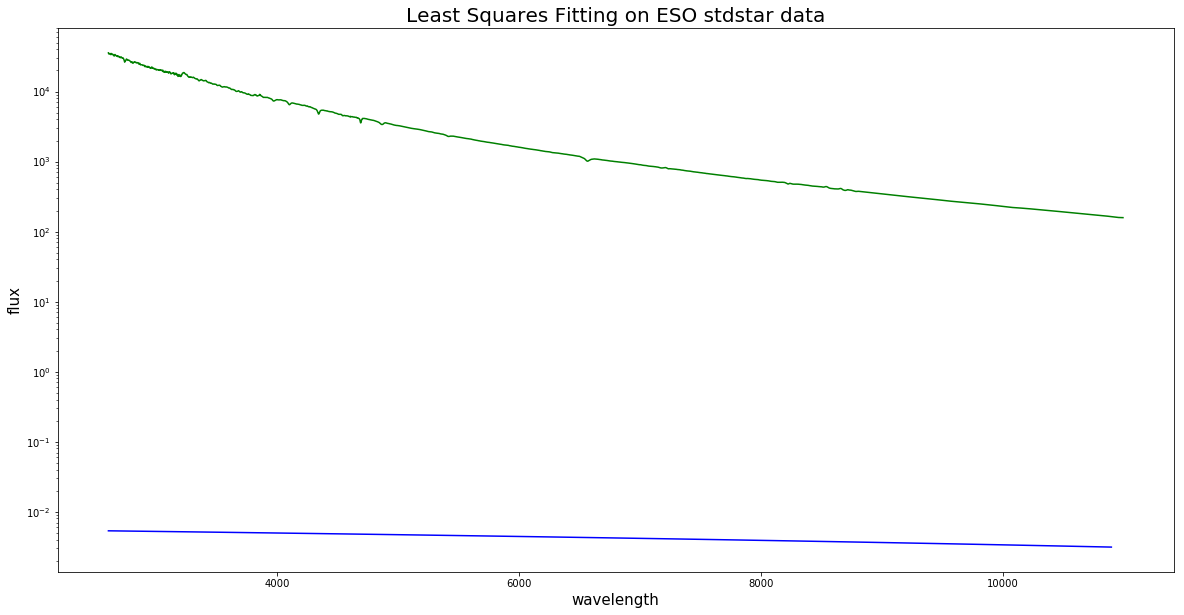

In [22]:

#now that its reduced and plotted well, need to fit a line to eso flux data
#least squares fitting

#using wl range cuts on eso data for fitting
ss_wl = sstar_table2['wl']
ss_flux_ergs = sstar_table2['flux-ergs']

plt.figure(figsize=(20,10))
plt.plot(ss_wl,ss_flux_ergs,color='g')
coeff = np.polyfit(ss_wl,ss_flux_ergs,3)
print ('coeffs are:',coeff)
x = np.arange(np.min(ss_wl),np.max(ss_wl),100)
y = x*coeff[0]+coeff[1]

# plot best fit line
bf_line = plt.plot(x,y,color='b')
plt.yscale('log')
plt.ylabel('flux',fontsize=15)
plt.xlabel('wavelength',fontsize=15)
plt.title('Least Squares Fitting on ESO stdstar data',fontsize=20)

In [23]:
t=fits.open('DoubleSpec/20151108/blue0093.fits')
t[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  460 / length of data axis 1                          
NAXIS2  =                 2835 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format defined in Astronomy and
COMMENT   Astrophysics Supplement Series v44/p363, v44/p371, v73/p359, v73/p365.
COMMENT   Contact the NASA Science Office of Standards and Technology for the   
COMMENT   FITS Definition document #100 and other FITS information.             
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
OBJECT  = 'AnaK_1pa2'       

In [24]:
#Target list

#AnaK-1 1.0"
    #w/ 23.1 ring angle
    #w/ 113.11 ring angle
#ANaK-2 1.0"


## AnaK-1 with 23.1 ring angle

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


4 target files located


choose 2D spec for redside
choose 1D target spec axis limits for redside


(-200, 1000)

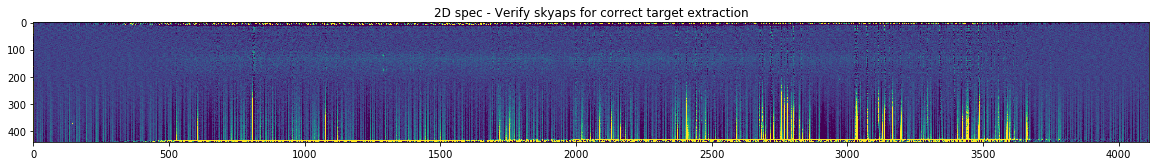

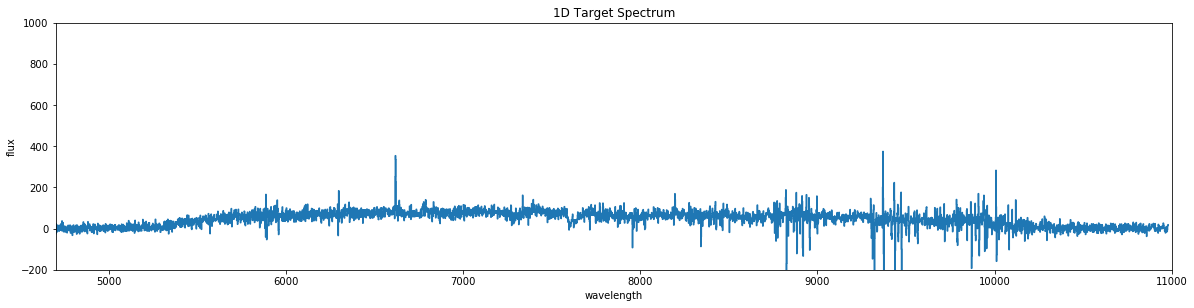

In [25]:
targetID_red10 = 'AnaK_1'
#skyaps_red10 = [(50,115),(185,320)] #works with poly3 #[(50,115),(160,400)]
skyaps_red10 = [(30,110),(185,200)] #(155,230)]
all_side_files_target='DoubleSpec/20151108/red*.fits'
flatid='DomeFlats 1p0'
#specaps=(120,155) works with skyaps 50,115,185,320#(115,180)
specaps=(120,150) #super narrowed in to find it better, but #'ed out was original best#120-150
#116-182
vmax=40
vmin=-10
#model=('poly',3)#'linear'
model_red =('poly',2) #('legendre',2) #'linear'#
flux_red10_AK1,unc,comb = pipeline.sky_subtract(targetID_red10,skyaps_red10,ds_red10,all_side_files_red10,atlasfiles_red10,all_side_files_target,flatid,specaps,vmax,vmin,model_red)
plt.ylim(-200,1000)

In [26]:
#ended playing with sky aps and spec aps on above. want to run eriks modeling test next
#need to slack about fitting flux, but first try matching data tables by wl and compare 
#ratios saga/eso to plot how spec would +/- plot ratio line with saga spec same graph

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


4 target files located


choose 2D spec for blueside
choose 1D target spec axis limits for blueside


(-200, 500)

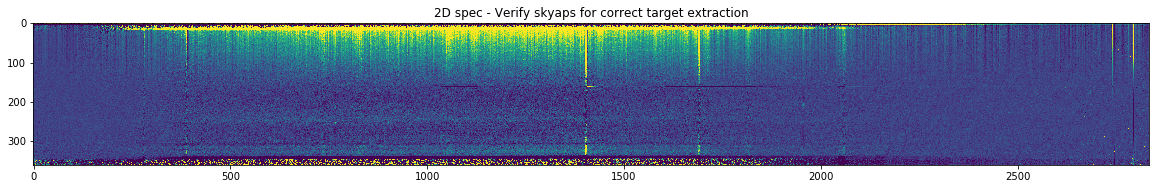

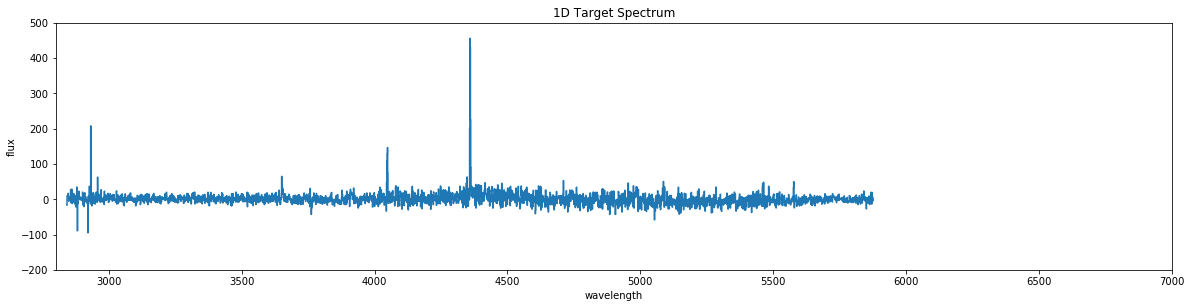

In [27]:
targetID_blue10 = 'AnaK_1'
skyaps_blue10 = [(140,270),(305,340)]#[(150,270),(305,400)]--works with poly2#[(50,115),(185,320)]
all_side_files_target_blue='DoubleSpec/20151108/blue*.fits'
flatid='DomeFlats 1p0'

specaps=(285,295)#(275,300) #####(255,310)#gets both emission line wiggles
vmax=40
vmin=-10
#model='linear'
model_blue=('poly',2)
flux_blue10_AK1,unc,comb = pipeline.sky_subtract(targetID_blue10,skyaps_blue10,ds_blue10,all_side_files_blue10,atlasfiles_blue10,all_side_files_target_blue,flatid,specaps,vmax,vmin,model_blue)
plt.ylim(-200,500)

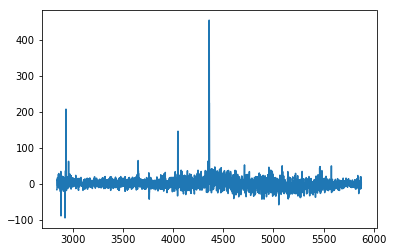

In [28]:
plt.step(ds_blue10.pixtowl(np.arange(len(flux_blue10_AK1))), flux_blue10_AK1)

this is the complete 1D flux array:


(-200, 600)

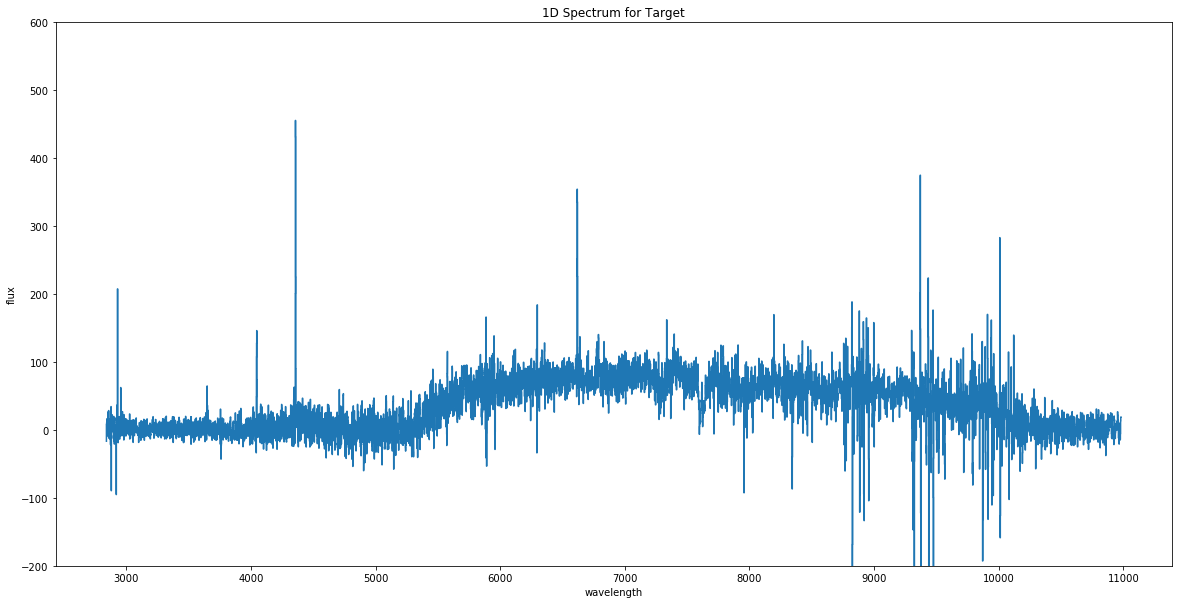

In [29]:
plt.figure(figsize=(20,10))
AK1_flux,AK1_wl=pipeline.combine_red_blue(ds_red10,ds_blue10,flux_red10_AK1,flux_blue10_AK1)
plt.ylim(-200,600)

In [30]:
t=fits.open('DoubleSpec/20151108/blue0095.fits')
#t[0].header

# AnaK-1 with 113.1 ring angle

## RED side

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


4 target files located


choose 2D spec for redside
choose 1D target spec axis limits for redside


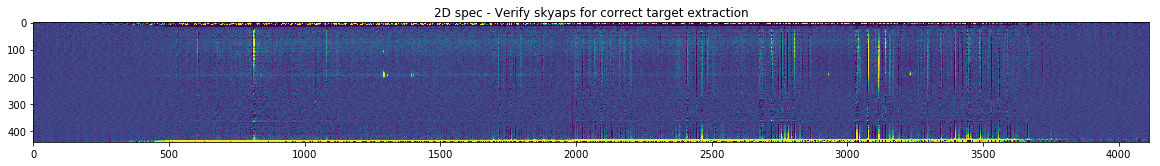

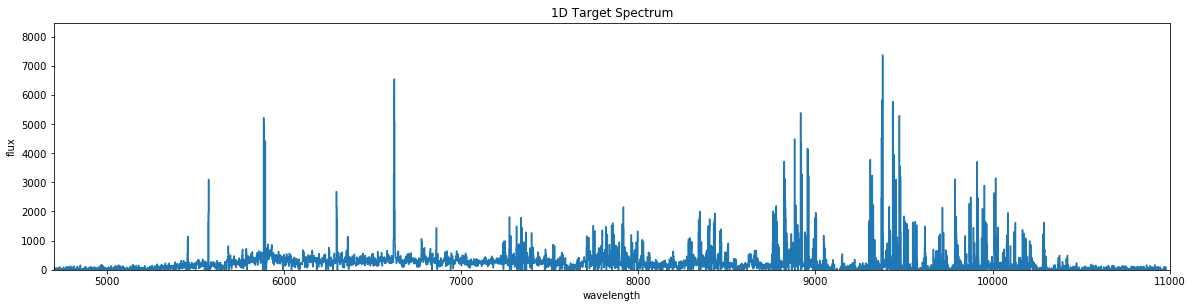

In [31]:
targetID113_red10 = 'AnaK_1pa2'
skyaps113_red = [(20,30),(260,375)] #[(20,40),(210,255)] #270didnt work
specaps113=(43,204)
#43-204
#model_red =('poly',2) #('legendre',2) #'linear'#

target_flux_red, target_unc_red, target_comb_red = pipeline.sky_subtract(targetID113_red10,skyaps113_red,ds_red10,all_side_files_red10,atlasfiles_red10,all_side_files_target,flatid,specaps113,vmax,vmin,model_red)



In [32]:
#isolates the sky-subtracted 2D spectrum

#choose best emission line side
##############################################
best_emission_comb = target_comb_red
best_emission_skyaps = skyaps113_red
best_emission_model = model_red
##############################################

#sky-subtracting 2D
subimg2, comb2, fitmodels = sky_subtract2D(best_emission_comb, best_emission_skyaps, best_emission_model)
#subimg2 is sky-subtracted, instumentation noise subtracted, stacked data
#comb2 is original instrumentation noise subtracted, stacked data
#fitmodels is sky lines fitted to 'model' type

FLUX_DATA is the target's entire 2D SPEC WILL WANT TO USE - ENTIRE REDSIDE (minus first 10 wls)
flux data shape: (176, 4104)
NOTE 10 spectral PIXELS missing  WL_PIX_CORRECTION DEFINED HERE!!!!!! 


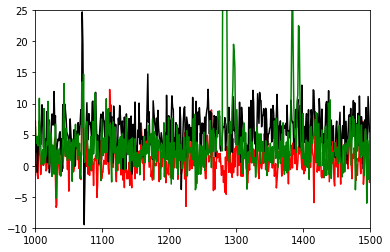

In [33]:
#PART ONE -----------------prep for centroiding

#first need to get target only 2D aka(1D spectrum for each spatial pixel row in the 2D target data)
############################################
target_aperature=(35,210)#(43,204) #target location
############################################
space_pix_correction = target_aperature[0]

flux_data=[] #to hold target only 2d spec
apslc = np.arange(target_aperature[0],target_aperature[1]+1,1) #list of rows to extract spec from
#np.shape(subimg2.data)#(440, 4114)


#extracting target spec from whole 2d spec
for i in apslc:
    spec = subimg2.data[i]#subimg2 is sky-subtracted 2D spec #this is every row's spec...
    
    #need to change if suming multiple pixel rows
    spec = spec[10::] #chops first 10 flux values in spectral (wl) direction-crazy osscillations
    flux_data.append(spec) #collects every row's spec within the target location
flux_data=np.array(flux_data)   
#need to find a way to sum over diff ranges of apslc 

#######################################################
#defining spectral correction factor (try to fit this into loop above later on)
wl_pix_correction = 10 #wont affect spatial pix values, only amount of flux but thats negligible
#######################################################

#just to visually confirm
plt.plot(flux_data[95],color='r')#near galaxy center
plt.plot(flux_data[35],color='k') #near galaxy edge
plt.plot(flux_data[155],color='g')#near opposite galaxy edge
plt.xlim(1000,1500)
plt.ylim(-10,25)

#conclusions
print("FLUX_DATA is the target's entire 2D SPEC WILL WANT TO USE - ENTIRE REDSIDE (minus first 10 wls)" )
print('flux data shape:', np.shape(flux_data)) #(226, 4104)
print('NOTE 10 spectral PIXELS missing ', 
      'WL_PIX_CORRECTION DEFINED HERE!!!!!! ')

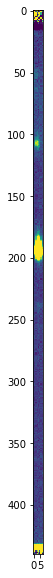

In [34]:
#PART TWO ----------------------determining best emission line pixel range

#using FULL ccd pixel range
################################################################
testingthis=subimg2.data[:,1289:1297] #[space,wl]for RED [wl,space]for BLUE
#conclusions
bestline_range_fullccd = (1289, 1297)
bestline_range_correction = (1279,1287) 
#################################################################

vmin=-10
vmax=45
plt.figure(figsize=(10,10))
plt.imshow(testingthis,vmin=vmin,vmax=vmax)#add in ,aspect='auto', to get square pixels

(1289, 1295)

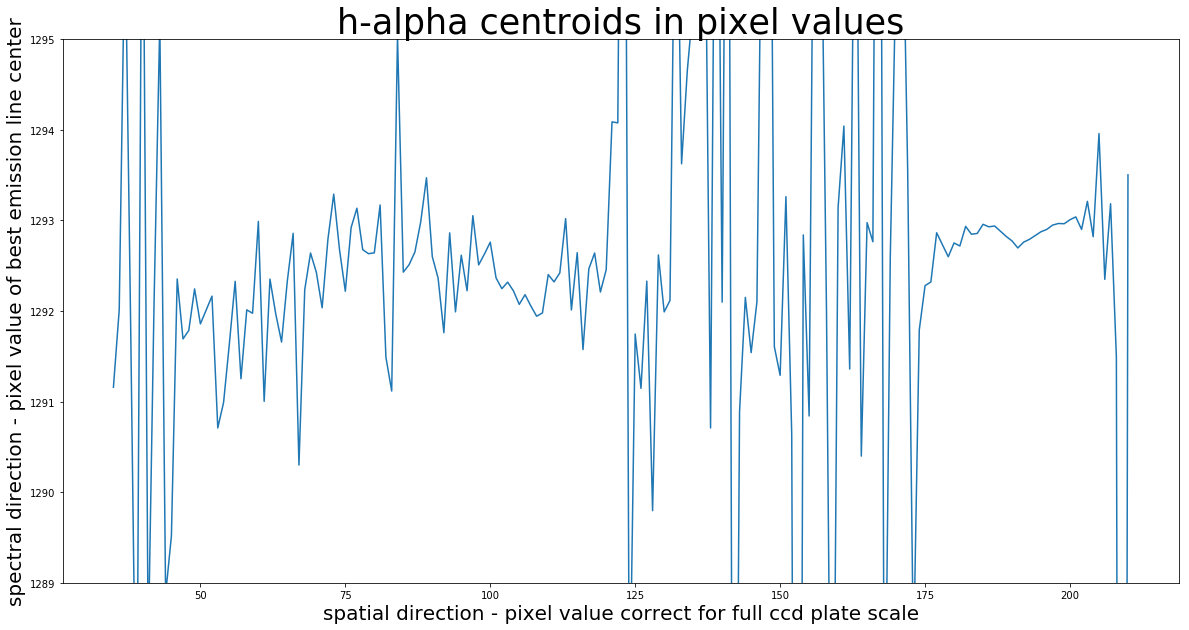

In [35]:
#PART THREE ------------------------------does the centroiding

#applies DS using full ccd pixel range 
#####################################################################
wl = np.array(ds_red10.pixtowl(np.arange(len(subimg2.data[::][0]))))
#getting corresponding flux & wl values in best emission line region of 2D
wl_shorter2 = wl[1289:1297] #isolate wl around h-alpha using 'bestline_range_fullccd'
flux_data_short = flux_data[:,1279:1287] #use 'bestline_range_correction' range
#####################################################################


centroids_pix = []
mylist_ys2 = []
gfit_vals = []
stddev = []
means=[]
means_unc=[]




#gets halpha centroids/gaussians/uncertainities in target gal's range

for row in flux_data_short: 
    
    #calculates centroids per row
    flux_fake2d2 = row[np.newaxis, :] #makes each row array into a fake2d
    centroid_xs, centroid_ys = centroid_com(flux_fake2d2)#finds center(x,y) of best emission line for each row array
    mylist_ys2.append(centroid_ys)
    #print(centroid_xs, centroid_ys)
    centroids_pix.append(centroid_xs) #collects all best emission line centroids per row
    
    #calculating errors per row via gaussian fit
    x = ar(range(len(row)))
    y = row
    mean = centroid_xs
    g_init = models.Gaussian1D(amplitude=max(y), mean=mean, stddev=2.)
    fit_g = fitting.LevMarLSQFitter()
    gaussian = fit_g(g_init, x, y)
    gfit_vals.append(gaussian)
    stddev.append(gaussian.stddev.value)
    means.append(gaussian.mean.value)

    #trying to get uncertainities per row via covariance matrix
    gaussian.param_cov = fit_g.fit_info['param_cov']
    means_unc.append(fit_g.fit_info['param_cov'])#matrix fix
    #means_unc.append(fit_g.fit_info['param_cov'][1][1]) #if gives errors use matrix fix
    
    
#end of for loop  - making things into arrays so easier to work with  
centroids_pix = np.array(centroids_pix) #best emission line centroids (wl) array
gfit_vals = np.array(gfit_vals)  #all gaussian outputs in pixels
gauss_stddev = np.array(stddev) #std of gaussians in pixels
gaussian_means = np.array(means) #gaussian peaks in pixels


#converting pixel values to be wrt full cdd
#wl axis
centroid_specpix_fullccd = centroids_pix + wl_pix_correction + bestline_range_correction[0]
gaussmax_specpix_fullccd = gaussian_means + stddev + wl_pix_correction + bestline_range_correction[0]
gaussmeans_specpix_fullccd = gaussian_means + wl_pix_correction + bestline_range_correction[0]
#space axis
target_spacepix_fullccd = np.arange(len(centroids_pix)) + space_pix_correction


 
    
#plotting
plt.figure(figsize=(20,10))
plt.xlabel("spatial direction - pixel value correct for full ccd plate scale",fontsize=20)
plt.ylabel('spectral direction - pixel value of best emission line center',fontsize=20)
plt.plot(target_spacepix_fullccd,centroid_specpix_fullccd)#(spaital pix index,corrected "wl" of centroid values (still in pix space))
###########################################################
plt.title('h-alpha centroids in pixel values',fontsize=35)
###########################################################
plt.ylim(1289,1295)

In [36]:
#matrix fix

#takes out unc value from each matrix
#exploring means_unc problem/solution


print('10',type(means_unc[10]))

#determining which index of matrix value i want
print(np.shape(means_unc), 'MATRIX', means_unc[1],'SECOND ROW', means_unc[1][1], 'MIDDLE',means_unc[1][1][1])
print('possible problem matrix here',means_unc[10])

#setting up indexing array to explore all the matrices in for loop
matrix = np.arange(0,len(means_unc),1)
print('matrix length array', matrix)


badmatrix = np.array([ 0.0, 0.0, 0.0, 0.0, 100.0, 0.0, 0.0, 0.0, 0.0])
badmatrix = np.reshape(badmatrix,(3,3))
print('shape',np.shape(badmatrix),'middle index',badmatrix[1][1])

unc = []
uncs = [] 
badvalues = []  
    
for i in matrix:
    #np.array([means_unc])
    #empty == type(np.any(means_unc[10])) #np.bool
    #print('empty',empty)
    if np.any(means_unc[i]) == None:
        print('bad matrix at array:',i)
        badvalues.append(i)
        for j in badvalues:
            means_unc[j] = badmatrix
            ##uncs.append(means_unc[j][1][1])
            #print('one replaced uncs',uncs)
            #print('replaced with', means_unc[j])
            #print('right index?', means_unc[j][1][1])
            #print('replaced type',type(means_unc[j]))
    else:
        np.all(means_unc[i]) == np.all(means_unc[i])
        #print('reg type',type(means_unc[i]),'i=',i) #np.ndarray
    uncs.append(means_unc[i][1][1]) #does same as below
    #print('one original uncs',uncs)
    
unc.append(uncs) #does same as above
print('unc',np.shape(unc),len(unc),'uncs',np.shape(uncs),len(uncs))
print('uncs best b/c of shape but unc or uncs are both same array of middle term from matrices....ie sigma**2')
#print('unc len',len(unc),'unc shape',np.shape(unc),'unc',unc)

#print("another row", 'MATRIX', means_unc[51],'SECOND ROW', means_unc[51][1], 'MIDDLE',means_unc[51][1][1])
#print('maybe uncs is best',uncs,'shape',np.shape(uncs),'length',len(uncs))

print('use uncs for means_unc')

10 <class 'numpy.ndarray'>
(176,) MATRIX [[   9.45396392   -6.76268834   26.82208823]
 [  -6.76268834  123.85694682  -85.75101071]
 [  26.82208823  -85.75101071  204.74648557]] SECOND ROW [  -6.76268834  123.85694682  -85.75101071] MIDDLE 123.856946816
possible problem matrix here [[  2.12481700e+14  -2.78619581e+10  -2.82716015e+11]
 [ -2.78619581e+10   3.65343798e+06   3.70715304e+07]
 [ -2.82716015e+11   3.70715304e+07   3.76165784e+08]]
matrix length array [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131

# remove BAD gaussian fits

In [37]:
#plotting where bad gaussian fits are as determined by a bad matrix out

old_gaussian_means = gaussian_means
new_gaussians = []
for index in badvalues:
    old_gaussian_means[index] = np.nan
    new_gaussians = old_gaussian_means

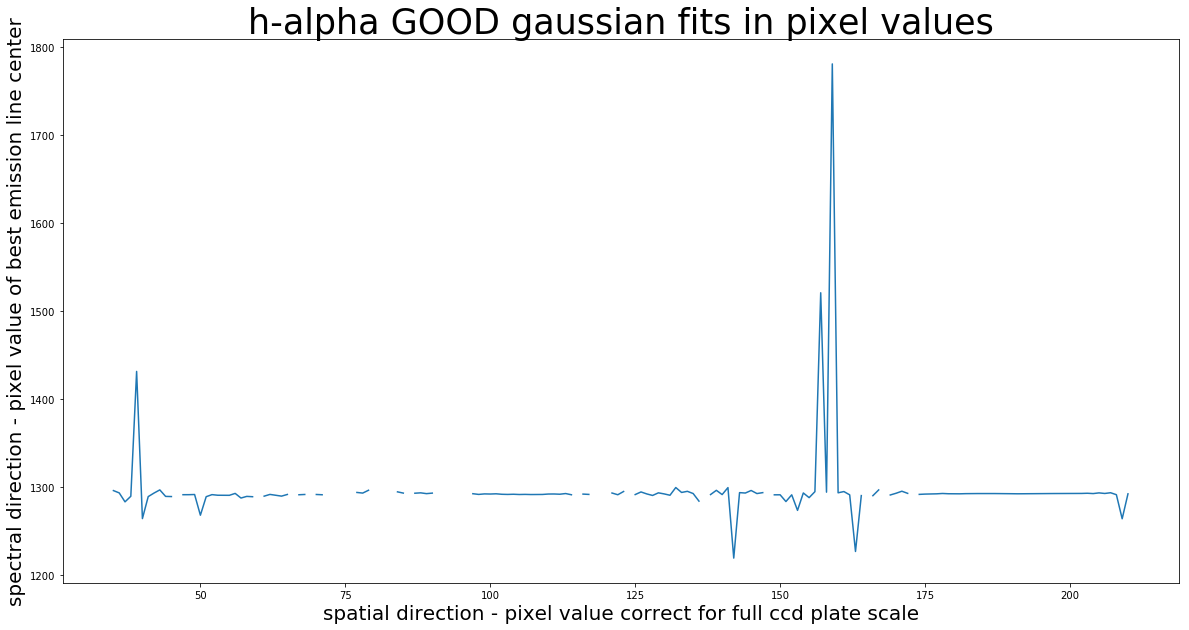

In [38]:
gfullccd_withnans = new_gaussians + wl_pix_correction + bestline_range_correction[0] #if new_gauss = nan, stays nan value

#plotting
plt.figure(figsize=(20,10))
plt.xlabel("spatial direction - pixel value correct for full ccd plate scale",fontsize=20)
plt.ylabel('spectral direction - pixel value of best emission line center',fontsize=20)
plt.plot(target_spacepix_fullccd,gfullccd_withnans)#(spaital pix index,corrected "wl" of centroid values (still in pix space))
###########################################################
plt.title('h-alpha GOOD gaussian fits in pixel values',fontsize=35)
###########################################################
#plt.ylim(1289,1295)

(1289, 1295)

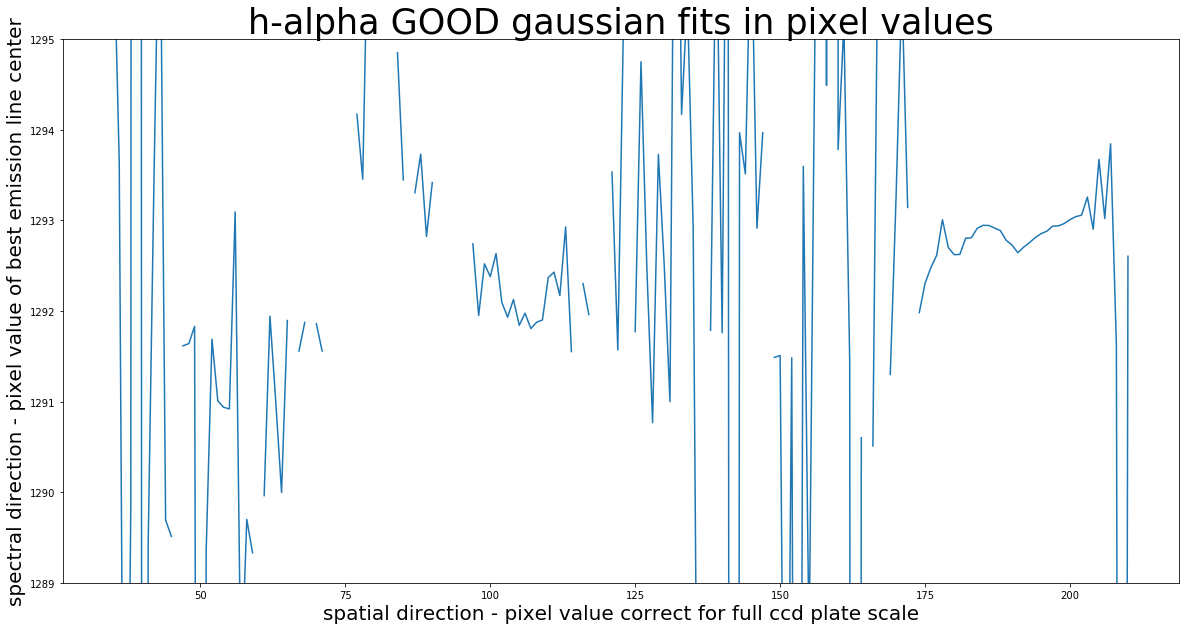

In [39]:
#same as above with better zoom 


#plotting
plt.figure(figsize=(20,10))
plt.xlabel("spatial direction - pixel value correct for full ccd plate scale",fontsize=20)
plt.ylabel('spectral direction - pixel value of best emission line center',fontsize=20)
plt.plot(target_spacepix_fullccd,gfullccd_withnans)#(spaital pix index,corrected "wl" of centroid values (still in pix space))
###########################################################
plt.title('h-alpha GOOD gaussian fits in pixel values',fontsize=35)
###########################################################
plt.ylim(1289,1295)

# back to using bad matrix fix

(6620, 6625)

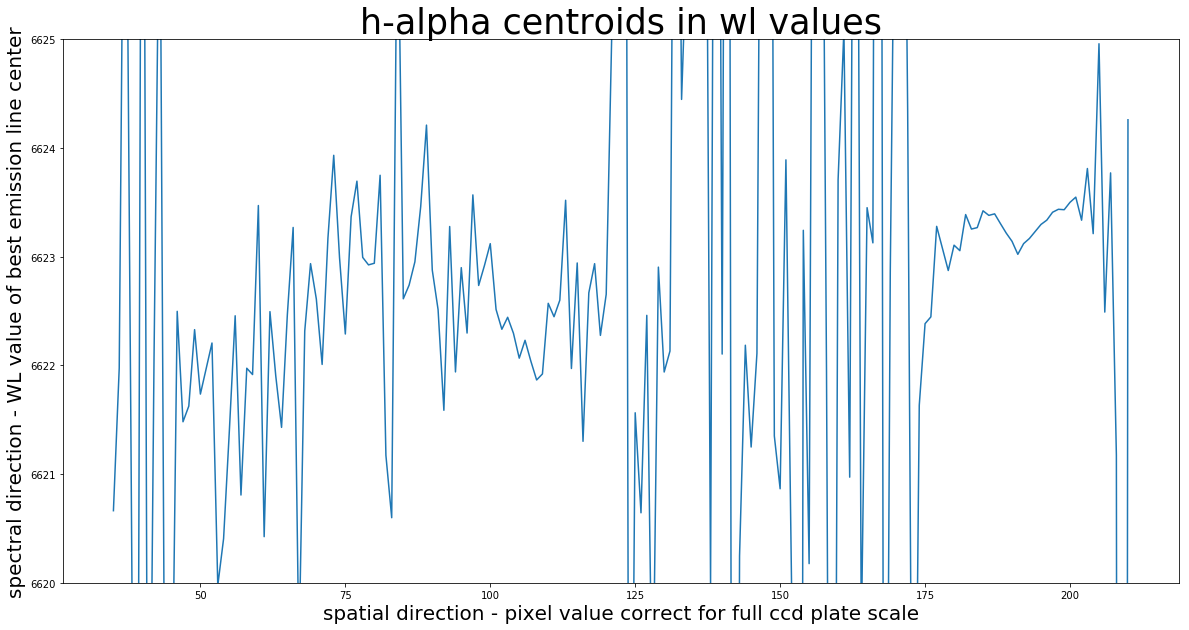

In [40]:
#converted centroids to wl to see how much of a shift there is

#applies ds
################################################################
wl_centroids = np.array(ds_red10.pixtowl(centroid_specpix_fullccd))
#################################################################

#plotting
plt.figure(figsize=(20,10))
plt.xlabel("spatial direction - pixel value correct for full ccd plate scale",fontsize=20)
plt.ylabel('spectral direction - WL value of best emission line center',fontsize=20)
plt.plot(target_spacepix_fullccd,wl_centroids)#(spaital pix index,corrected "wl" of centroid values (still in pix space))
##########################################################
plt.title('h-alpha centroids in wl values',fontsize=35)
##########################################################
#plt.ylim(6785,6790) #with target app (43,204)
plt.ylim(6620,6625)

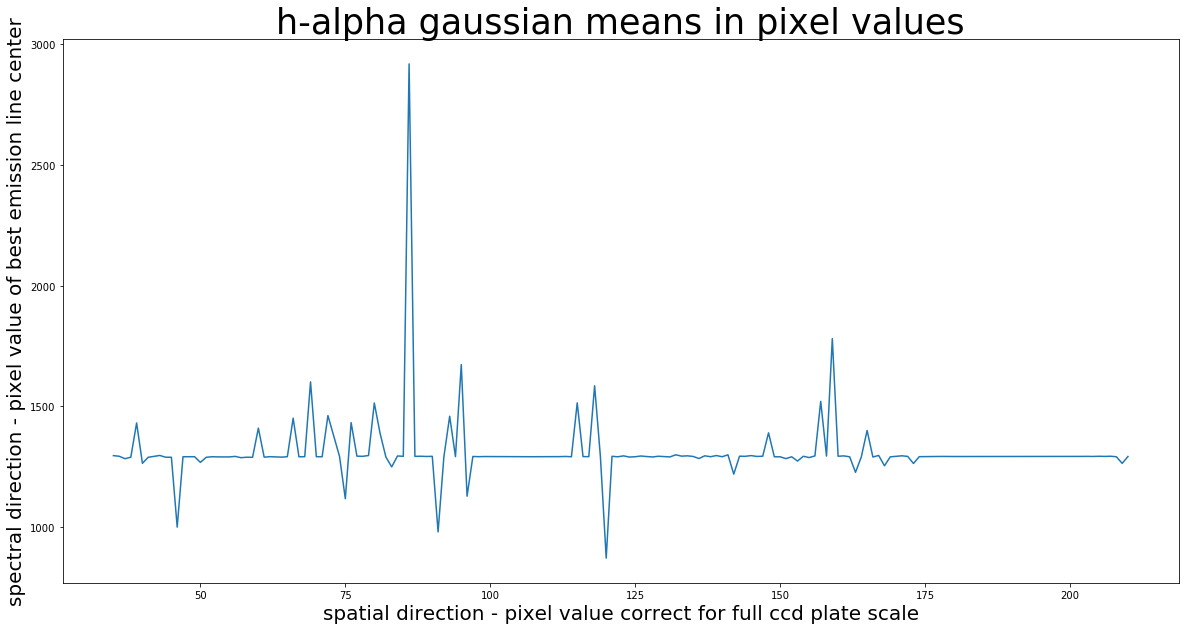

In [41]:
#plotting
plt.figure(figsize=(20,10))
plt.xlabel("spatial direction - pixel value correct for full ccd plate scale",fontsize=20)
plt.ylabel('spectral direction - pixel value of best emission line center',fontsize=20)
plt.plot(target_spacepix_fullccd,gaussmeans_specpix_fullccd)#(spaital pix index,corrected "wl" of centroid values (still in pix space))
###########################################################
plt.title('h-alpha gaussian means in pixel values',fontsize=35)
###########################################################

(6620, 6625)

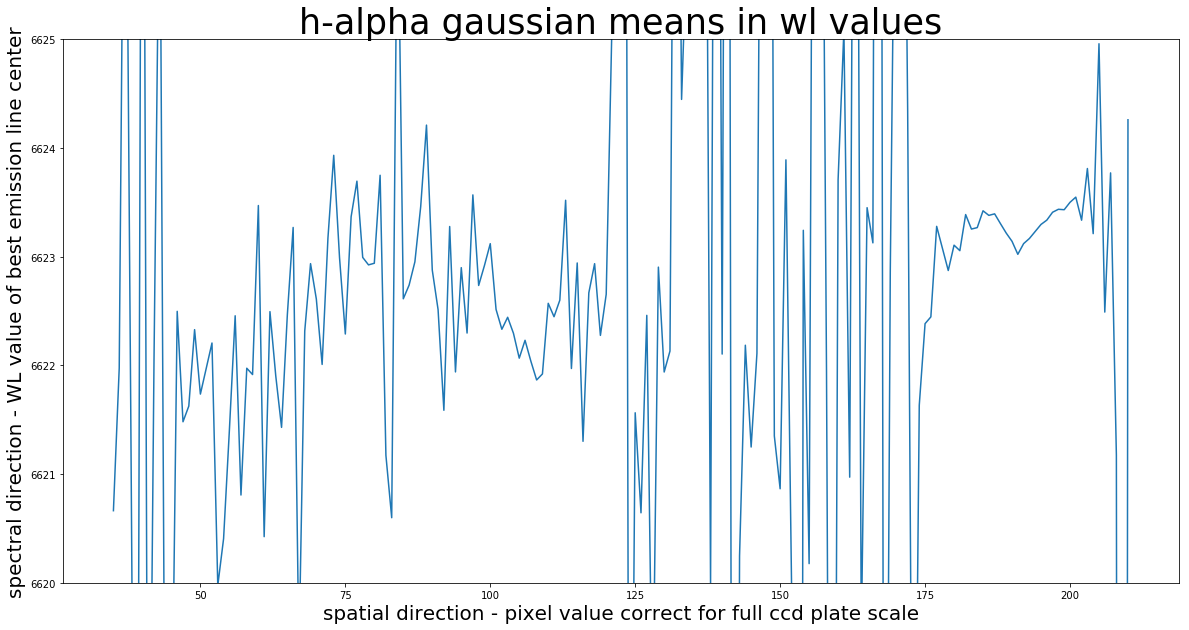

In [42]:
#applies ds
################################################################
wl_gaussians = np.array(ds_red10.pixtowl(gaussmeans_specpix_fullccd))
#################################################################

#plotting
plt.figure(figsize=(20,10))
plt.xlabel("spatial direction - pixel value correct for full ccd plate scale",fontsize=20)
plt.ylabel('spectral direction - WL value of best emission line center',fontsize=20)
plt.plot(target_spacepix_fullccd,wl_gaussians)#(spaital pix index,corrected "wl" of centroid values (still in pix space))
##########################################################
plt.title('h-alpha gaussian means in wl values',fontsize=35)
##########################################################
plt.ylim(6620,6625)

shape of first section: (176, 50) matches shape of second section: (176, 50)
shape of first section 2d: (176, 1)
shape of second section 2d: (176, 1)
first section centroid x,y: 0.0 69.2783184406
second section centroid x,y: 0.0 71.3872943079
This is the average pixel value of the core BEFORE SPATIAL CORRECTIONS 70.3328063743
Pixel Value of core along spatial axis wrt full CCD size 105.332806374


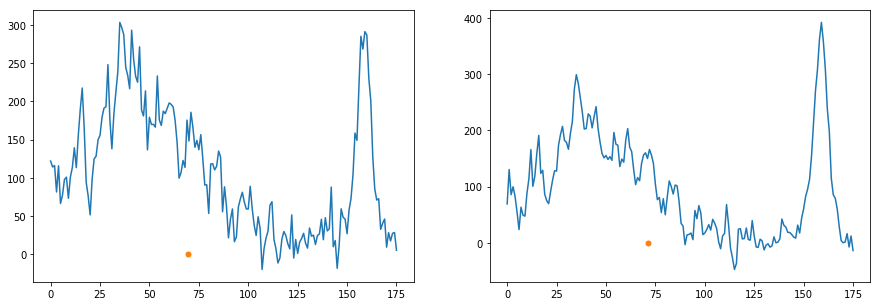

In [43]:
#USING SECTIONS SURROUNDING HALPHA WL RANGE
np.shape(flux_data)#(226,4104) #note that this is missing those wl's


#making arrays surrounding best emission line
################################################
upperha = 1287
lowerha = 1279
#################################################
width_sections = 50 #reduced from 50 to 25 to avoid cosmic rays skewing to higher pix side
upper_one = lowerha - 1 #distance to avoid line emission contaminating core determination
lower_one = upper_one - width_sections
lower_two = upperha + 1 #giving it some distance
upper_two = lower_two + width_sections
first_section = flux_data[:,lower_one:upper_one]
second_section = flux_data[:,lower_two:upper_two]
print('shape of first section:', np.shape(first_section), 'matches shape of second section:', np.shape(second_section))


#collapsing both sections in the spatial direction (histogram like)
first_section_sum = np.sum(first_section,axis=1) 
first_section2d = first_section_sum[:,np.newaxis] #2d required to centroid
second_section_sum = np.sum(second_section,axis=1)
second_section2d = second_section_sum[:,np.newaxis] #2d required to centroid
print('shape of first section 2d:', np.shape(first_section2d))
print('shape of second section 2d:', np.shape(second_section2d))


#does the centroiding
x_first, y_first = centroid_com(first_section2d)
x_second, y_second = centroid_com(second_section2d)
print('first section centroid x,y:',x_first,y_first)
print('second section centroid x,y:',x_second,y_second)



#verify by plots
f, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
ax1.plot(first_section2d);
ax2.plot(second_section2d);
#note below had to reverse xy centroids to visualize correctly, not sure why it inverted tho...
ax1.plot(y_first,x_first, '.', markersize=10)
ax2.plot(y_second,x_second, '.', markersize=10)


#averaging the two core values, the y's
core_array = np.array([y_first,y_second])
core_avgcentroids = np.mean(core_array)
print('This is the average pixel value of the core BEFORE SPATIAL CORRECTIONS',core_avgcentroids)

#FULL CCD pixel value of core
core_from_sections = core_avgcentroids + space_pix_correction #corrects for spatial axis target cutout
print('Pixel Value of core along spatial axis wrt full CCD size',core_from_sections)

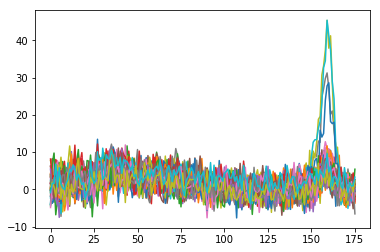

In [44]:
#testing areas above that appear to be over subtracted
#make changes in skyaps to see if via this graph, can fix ds


#plt.plot(first_section_sum)
#plt.plot(first_section);
#plt.ylim(-10,10)
plt.plot(flux_data[:,1288:1338]);
#plt.ylim(-11,5)

In [45]:
#NOTE THAT THIS CELL USES GAUSSIAN VALUES.....IF CENTROIDS HAVE BETTER FIT (less likely) CHANGE IT

#robust way to clean data (to avoid bad g fits)
#################################################################
cleaned_gaussmeans = sigma_clip(gaussian_means, sigma=3)
################################################################
avg_of_gmeans = np.mean(cleaned_gaussmeans)

#correcting avg Ha wl pixel value to reflect its place on the full ccd scale
bestline_corewl_pix_fullccd = avg_of_gmeans + wl_pix_correction + bestline_range_correction[0]
print(bestline_corewl_pix_fullccd)

#applying ds to get pix to wl value
########################################################################
bestline_core_wl = ds_red10.pixtowl(bestline_corewl_pix_fullccd)*u.angstrom
#########################################################################

print('Best emission line "core" wl (based on gaussian fits) is:',bestline_core_wl)

1292.536068
Best emission line "core" wl (based on gaussian fits) is: 6622.776394040264 Angstrom


/Users/dee/miniconda3/lib/python3.6/site-packages/astropy/stats/sigma_clipping.py:158: RuntimeWarning: invalid value encountered in greater
  _filtered_data.mask |= _filtered_data > max_value
/Users/dee/miniconda3/lib/python3.6/site-packages/astropy/stats/sigma_clipping.py:159: RuntimeWarning: invalid value encountered in less
  _filtered_data.mask |= _filtered_data < min_value


In [46]:
#centering around core first

#still in pixel space
distance_pix_wrtcore_sections = target_spacepix_fullccd - core_from_sections #for core wl using 2 sections around best emission line

In [47]:
#actual converting for loop CENTROIDS pixels to kpc
#good for core defined by 2 sections around halpha

#converts pixels to kpc (distance profile)
arcmins_sections =[]
distances_sections=[]
more_sections = []


#converts pix to kpc and saves as quantity list
for i in distance_pix_wrtcore_sections:
    r_in_arcmin = 1*u.arcmin
    redplatescale = 0.293*u.arcsec/u.pixel
    blueplatescale = 0.389*u.arcsec/u.pixel
    dbsp_pix_equiv_red = u.pixel_scale(redplatescale)
    dbsp_pix_equiv_blue = u.pixel_scale(blueplatescale)
    r_in_pixel = i*u.pixel
    ################################################################
    r_in_arcmin = r_in_pixel.to('arcmin', dbsp_pix_equiv_red)
    distance = 34.8*u.Mpc # distance of object (host) from us
    ###############################################################
    rad_to_arcmin = (1*u.rad).to('arcmin')
    r_in_kpc = ((r_in_arcmin/rad_to_arcmin)*distance).to("kpc") #gets radians*distancefromus for gal width in kpc
    more_sections = r_in_kpc #/ (1*u.kpc)
    distances_sections.append(more_sections.value)
distances_sections = np.array(distances_sections)

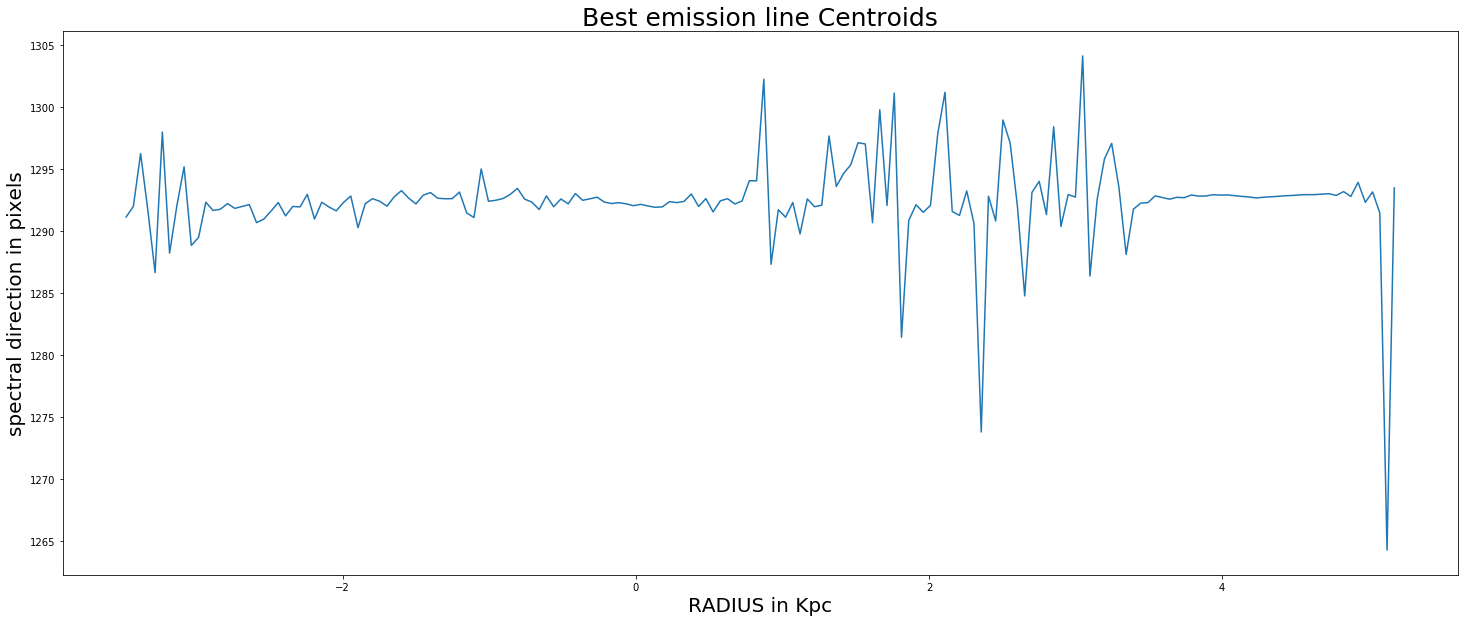

In [48]:
#CENTROID plot with pix-wls & kpc

plt.figure(figsize=(25,10))
plt.title('Best emission line Centroids', SIZE=25)
plt.xlabel('RADIUS in Kpc',fontsize=20)
plt.ylabel('spectral direction in pixels',fontsize=20)
plt.plot(distances_sections * u.kpc, centroid_specpix_fullccd)

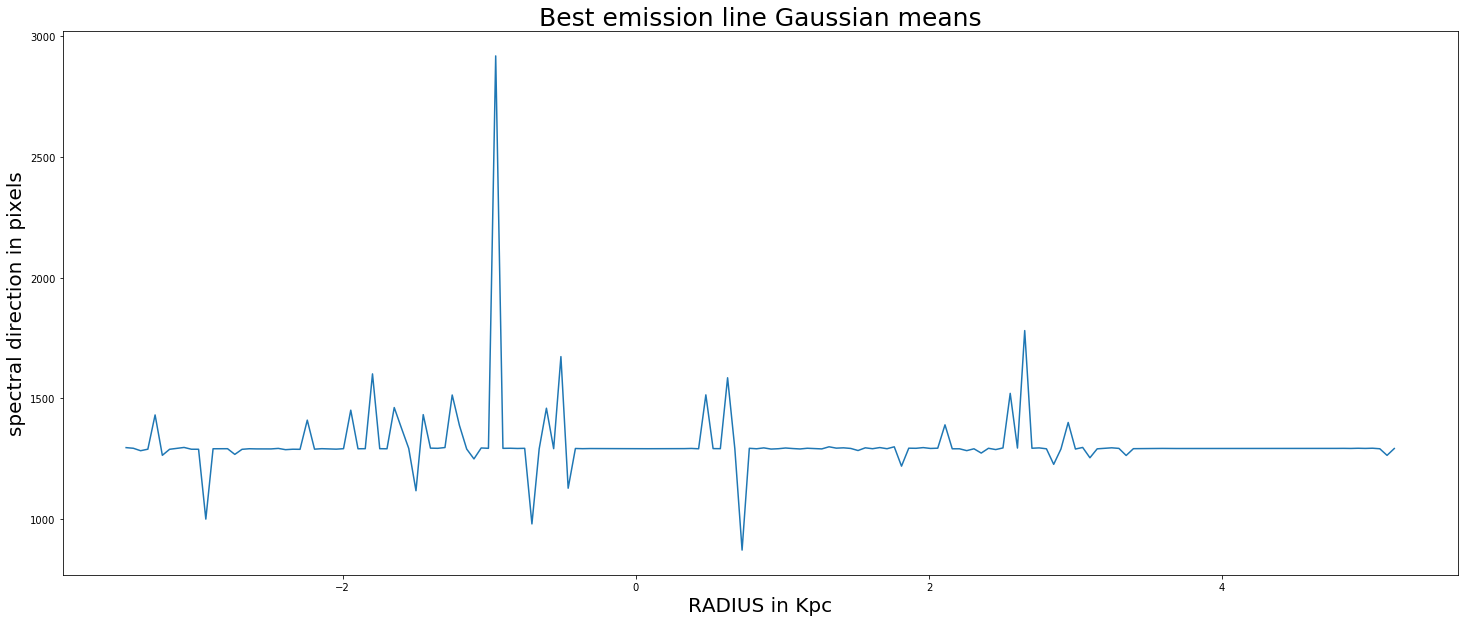

In [49]:
#GAUSSIAN MEANS plot with pix-wls & kpc

plt.figure(figsize=(25,10))
plt.title('Best emission line Gaussian means', SIZE=25)
plt.xlabel('RADIUS in Kpc',fontsize=20)
plt.ylabel('spectral direction in pixels',fontsize=20)
plt.plot(distances_sections * u.kpc, gaussmeans_specpix_fullccd)

In [50]:
#convert pix to wl via ds
###################################################################
centroids_wl = ds_red10.pixtowl(centroid_specpix_fullccd)*u.angstrom
gauss_meanWstd_wl  = ds_red10.pixtowl(gaussmax_specpix_fullccd)*u.angstrom
gauss_means_wl = ds_red10.pixtowl(gaussmeans_specpix_fullccd)*u.angstrom
core_wl_sections = ds_red10.pixtowl(core_from_sections)*u.angstrom
####################################################################

In [51]:
#using redshift formula to get velocity

#((obs_wl - true_wl)/true_wl)* c = velocity
#except what we want is  v_not relative to core - v_of core

#velocities NOT yet relative to the core
##############################################################################
v_spec_gaussians = ((gauss_means_wl/(6563*u.angstrom)) -1) * const.c #gaussian velocities
v_spec_centroids = (centroids_wl /(6563*u.angstrom) -1) * const.c #centroid velocities
v_core = ((bestline_core_wl/(6563*u.angstrom)) -1) * const.c #core velocity
###############################################################################

#velocities relative to the core from sections
y_axis_Gvelocity = (v_spec_gaussians - v_core).to('km/s')  #gaussian
y_axis_Cvelocity = (v_spec_centroids - v_core).to('km/s') #centroids

print("velocity of best emission line's spectral 'core':",v_core)

velocity of best emission line's spectral 'core': 2730536.660019364 m / s


# defed y_axis_Gvelocity above ^^^

In [52]:
# for i in y_axis_Gvelocity:
#     print(i)

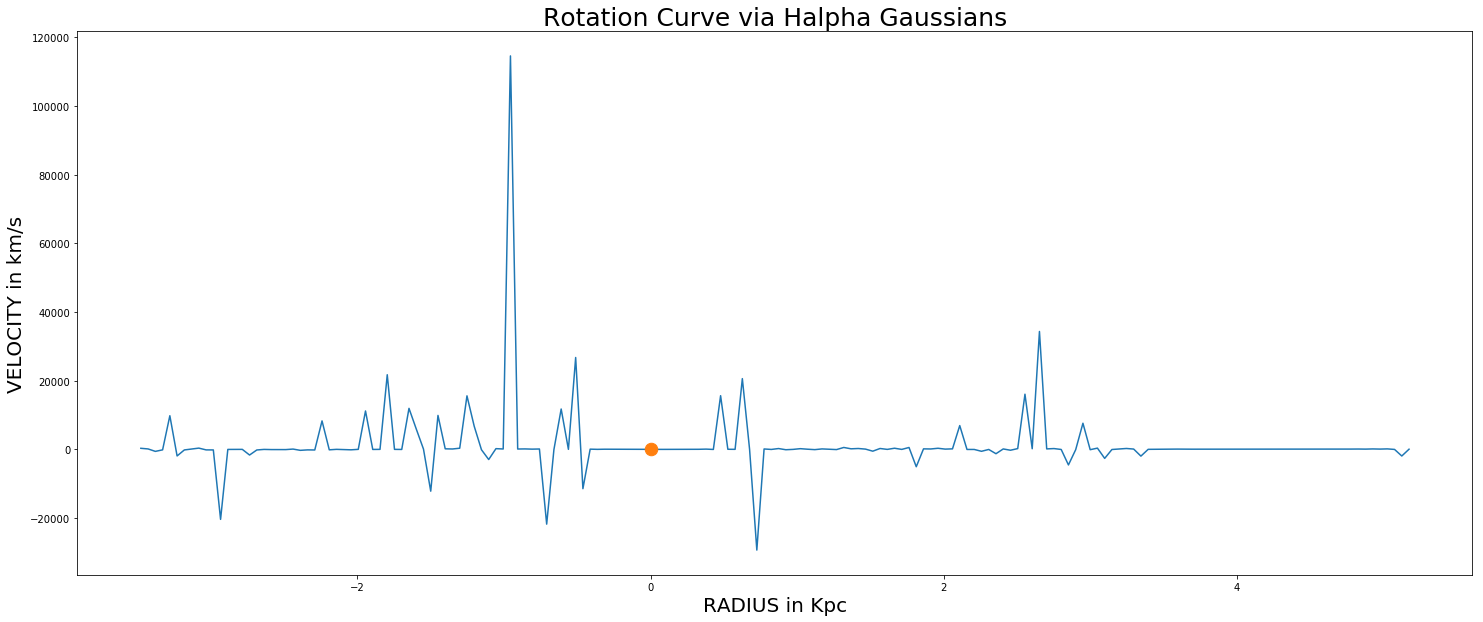

In [53]:
plt.figure(figsize=(25,10))
#######################################################
plt.title('Rotation Curve via Halpha Gaussians', SIZE=25)
#######################################################
plt.xlabel('RADIUS in Kpc',fontsize=20)
plt.ylabel('VELOCITY in km/s',fontsize=20)
plt.plot(distances_sections * u.kpc, y_axis_Gvelocity)
#plt.ylim(-250,250) #adjust as needed to center around zero
plt.plot(0,0,'.', markersize=25)

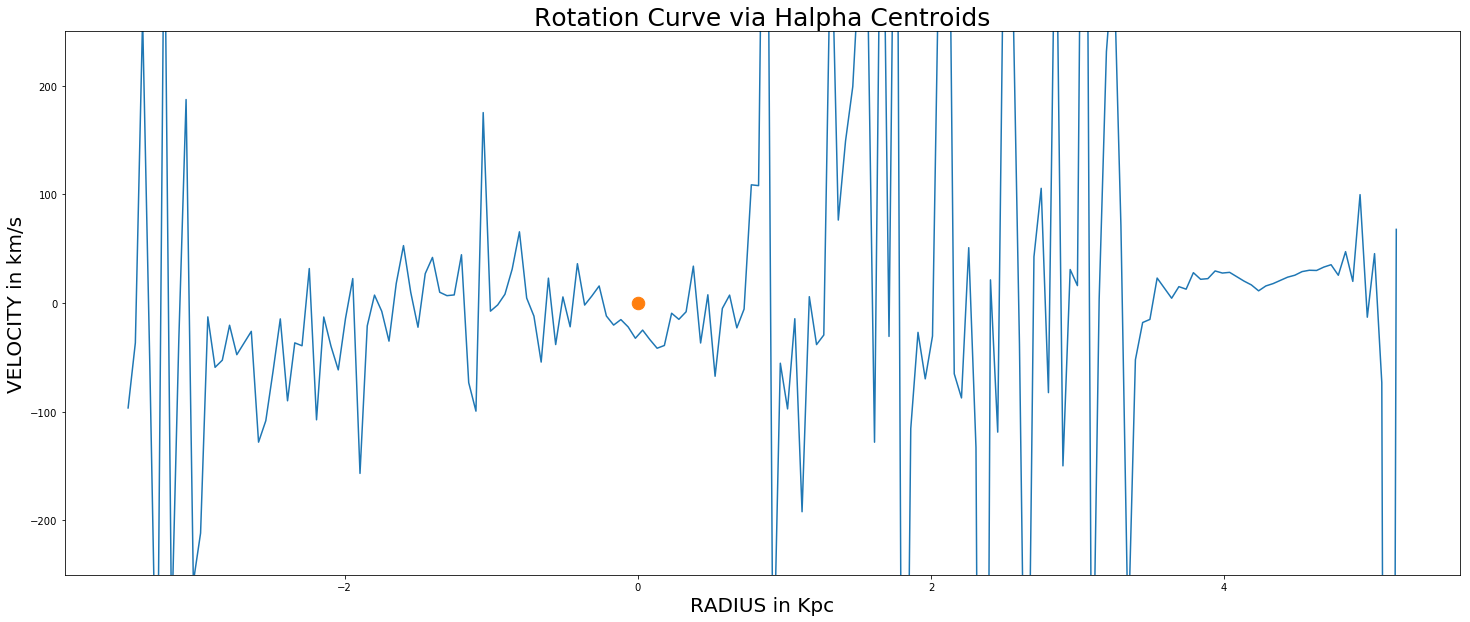

In [54]:
plt.figure(figsize=(25,10))
#######################################################
plt.title('Rotation Curve via Halpha Centroids', SIZE=25)
#######################################################
plt.xlabel('RADIUS in Kpc',fontsize=20)
plt.ylabel('VELOCITY in km/s',fontsize=20)
plt.plot(distances_sections * u.kpc, y_axis_Cvelocity)
plt.ylim(-250,250) #adjust as needed to center around zero
plt.plot(0,0,'.', markersize=25)

In [55]:
#using output from GAUSSIAN fit to determine error; tbd how to for CENTROIDS
print('unc:',np.shape(unc),unc)
#method to obtain sigma = subttract velocities of (mean+sigma) - mean = sigma 
#############################################used matrix trick so uncs = means_unc
sigma_gauss_pix = np.sqrt(np.abs(unc)) #taking sqrt of unc to get a true sigma
#############################################
#correct to full ccd pix scale
#for i in means_unc:
#    print(i)
#print(np.shape(gaussian_means),'sigs',sigma_gauss_pix,wl_pix_correction,bestline_range_correction[0])
print('means',np.shape(gaussian_means),'sig',np.shape(sigma_gauss_pix),'wlcorr',np.shape(wl_pix_correction),'bestline',np.shape(bestline_range_correction[0]))
means_Wsigma_fullccd = gaussian_means + sigma_gauss_pix + wl_pix_correction + bestline_range_correction[0]

#apply ds
means_max_wl = ds_red10.pixtowl(means_Wsigma_fullccd)*u.angstrom


#making into velocities
v_means_withsigma = (means_max_wl/ (6563*u.angstrom)-1) * const.c #be sure to check all values ok (no inf)
#in converting pix2wl2vel section...already did same steps for means w/o sigma


#extracting sigma velocity
v_unc = (v_means_withsigma - v_spec_gaussians).to('km/s') 
#for reference #v_spec_gaussians = ((gauss_means_wl/(6563*u.angstrom)) -1) * const.c #gaussian velocities



#print(np.shape(v_unc))
#np.reshape(v_unc,(226,))
print('v_unc', np.shape(v_unc))#make sure its same length as y_axis_Gvelocity

unc: (1, 176) [[129946604157280.05, 123.85694681643186, 6770.2859968124849, 60.683307409153556, 395669126124.40234, 19295749.336872343, 68218685.087923393, 4757967.9923645202, 214.80359154910039, 0.025240431687376878, 3653437.9801315302, 100.0, 0.23908357116552637, 0.1057252257896617, 12.452049748618292, 338841.57986344519, 38.71663977076205, 0.23173833783358525, 0.45385411319530061, 0.0097529219673301477, 0.054649948626917036, 14.569216193537931, 369.64559180228116, 41.193907649410981, 62.970623761239416, 100.0, 8.0605899889958934, 2.1117039095713852, 0.10630021554184073, 4.1323842298145026, 0.1622562703124267, 100.0, 1.8140156794685531, 1.2976597014714688, 100.0, 4.6618092222151608, 0.80653323909660912, 100.0, 100.0, 12.305627467494169, 100.0, 100.0, 1.8195734127170624, 24.146843802923733, 2062.0402241561378, 100.0, 100.0, 3671389.832295639, 100.0, 0.21502241166116809, 33.964442348676286, 100.0, 2.1630683630729575, 8.313836088830227, 0.51125663043446767, 15.208187843469869, 100.0, 3.

In [56]:
print(np.shape(y_axis_Gvelocity),np.shape(distances_sections),np.shape(v_unc),v_unc[0])

(176,) (176,) (1, 176) [ -1.01020361e+014   7.79890005e+002   5.76753730e+003   5.45862046e+002
  -1.68030722e+010   3.09122567e+005   5.65374922e+005   1.53884714e+005
   1.02711101e+003   1.11321397e+001   1.34797435e+005               nan
   3.42621521e+001   2.27839393e+001   2.47268095e+002   4.08910027e+004
   4.36004878e+002   3.37317623e+001   4.72058222e+001   6.91995336e+000
   1.63806412e+001   2.67468196e+002   1.34728002e+003   4.49739500e+002
   5.56051870e+002               nan   1.98939492e+002   1.01826301e+002
   2.28456578e+001   1.42441409e+002   2.82254963e+001               nan
   9.43760892e+001   7.98220415e+001               nan   1.51294078e+002
   6.29291078e+001               nan               nan   2.45813238e+002
               nan               nan   9.45231406e+001   3.44340709e+002
   3.18282235e+003               nan               nan   1.35129724e+005
               nan   3.24934846e+001   4.08387528e+002               nan
   1.03058735e+002   2.02048

In [57]:
#to get terminal commands run within a jupyter notebook
#!ls

# note theres some error with v_unc below, but fixed in later cell

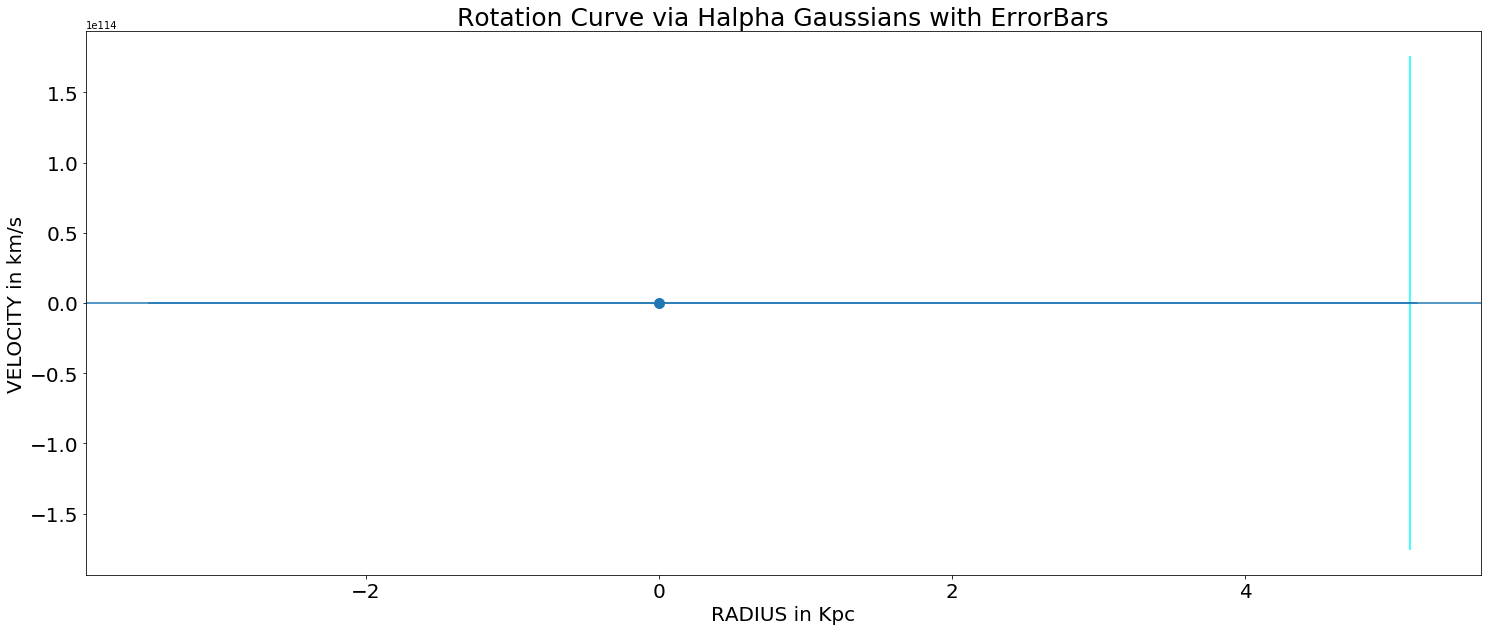

In [58]:
#rotation curve with gaussians with errorbars
plt.figure(figsize=(25,10))


arr = np.asarray #need to avoid setting array element as sequence
#had to chop last value b/c in sigma array = -inf
###############################################################################
plt.errorbar(arr(distances_sections * u.kpc), arr(y_axis_Gvelocity), yerr=arr(v_unc[0]),ecolor='cyan')
###############################################################################
plt.title('Rotation Curve via Halpha Gaussians with ErrorBars', SIZE=25)
plt.xlabel('RADIUS in Kpc',fontsize=20)
plt.ylabel('VELOCITY in km/s',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(0,0,'.',markersize=20)
#plt.ylim(-250,250)
#plt.ylim(-2000,2000)
plt.axhline(0)

original sigma values [[ -1.01020361e+014   7.79890005e+002   5.76753730e+003   5.45862046e+002
   -1.68030722e+010   3.09122567e+005   5.65374922e+005   1.53884714e+005
    1.02711101e+003   1.11321397e+001   1.34797435e+005               nan
    3.42621521e+001   2.27839393e+001   2.47268095e+002   4.08910027e+004
    4.36004878e+002   3.37317623e+001   4.72058222e+001   6.91995336e+000
    1.63806412e+001   2.67468196e+002   1.34728002e+003   4.49739500e+002
    5.56051870e+002               nan   1.98939492e+002   1.01826301e+002
    2.28456578e+001   1.42441409e+002   2.82254963e+001               nan
    9.43760892e+001   7.98220415e+001               nan   1.51294078e+002
    6.29291078e+001               nan               nan   2.45813238e+002
                nan               nan   9.45231406e+001   3.44340709e+002
    3.18282235e+003               nan               nan   1.35129724e+005
                nan   3.24934846e+001   4.08387528e+002               nan
    1.03058735e+

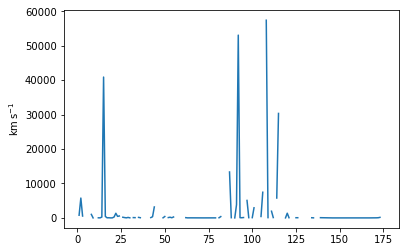

In [59]:
#adjusting weights to account for regions with bad gauss fits

print('original sigma values',v_unc)
#plt.plot(v_unc)
#plt.ylim(-1000,1000) #explored to determine a good value to set cut off b4 weights =inf
v_unc_realistic = []
for i in v_unc[0].value:
    if i >= 100000 or i <= -100: #eriks eqt 5 still gives same fit with i>=1000
        i = np.inf
    else:
        i = i #*u.s/u.km
    v_unc_realistic.append(i)
v_unc_realistic = v_unc_realistic*u.km/u.s
print('new sigma values', v_unc_realistic)

plt.plot(v_unc_realistic)

In [60]:
for i in y_axis_Gvelocity:
    print(i)

263.72955988946 km / s
78.20907068722137 km / s
-632.5870697963913 km / s
-189.13020021624584 km / s
9752.777840243558 km / s
-1965.4203644600627 km / s
-215.90270626490656 km / s
65.78486999689275 km / s
317.81428052292347 km / s
-199.25448753947205 km / s
-211.86945553924795 km / s
-20438.27750807931 km / s
-64.44650367672881 km / s
-62.8166729764631 km / s
-49.42603461404192 km / s
-1696.1953222328411 km / s
-222.94172096148228 km / s
-59.32622608808335 km / s
-106.98867635735684 km / s
-112.02137153076008 km / s
-113.27806221543113 km / s
39.055496071273 km / s
-329.69148617415084 km / s
-198.7216019288958 km / s
-224.56884236892873 km / s
8245.256099945898 km / s
-180.35812421995914 km / s
-41.512170049810784 km / s
-107.65104910336203 km / s
-177.89664863478393 km / s
-44.94806385299982 km / s
11139.125716113529 km / s
-68.53072306458233 km / s
-46.41675327509875 km / s
21693.371262078635 km / s
-47.35452721296856 km / s
-68.50343931457913 km / s
11899.66080845891 km / s
5907.665

In [61]:
#use this cell to plot velocity values with mask over values were realistic error bars go to infinity

testarr = y_axis_Gvelocity  
testarr2 = v_unc_realistic   
testtable = Table([testarr,testarr2],names=('vel','err'),masked=True)

y_axis_Gvelocity_crazyerrmasked = []
for row in testtable:
    ones = row['vel']
    twos = row['err']
    #print(ones, twos,'next')
    if twos == np.inf:
        ones = np.nan
        #print('err, vel:',ones)
    else:
        ones == ones
        #print('vel,vel:',ones)
    y_axis_Gvelocity_crazyerrmasked.append(ones)
#testtable
y_axis_Gvelocity_crazyerrmasked #vel array with nans

[nan,
 78.20907068722137,
 -632.58706979639135,
 -189.13020021624584,
 nan,
 nan,
 nan,
 nan,
 317.81428052292347,
 -199.25448753947205,
 nan,
 -20438.277508079311,
 -64.44650367672881,
 -62.816672976463103,
 -49.426034614041917,
 -1696.1953222328411,
 -222.94172096148228,
 -59.326226088083352,
 -106.98867635735684,
 -112.02137153076008,
 -113.27806221543113,
 39.055496071272998,
 -329.69148617415084,
 -198.72160192889581,
 -224.56884236892873,
 8245.2560999458983,
 -180.35812421995914,
 -41.512170049810784,
 -107.65104910336203,
 -177.89664863478393,
 -44.948063852999823,
 11139.125716113529,
 -68.530723064582332,
 -46.416753275098749,
 21693.371262078635,
 -47.354527212968563,
 -68.503439314579126,
 11899.66080845891,
 5907.6651981098539,
 39.574258249828127,
 -12228.55117256821,
 9841.4616954740468,
 114.67070588778844,
 64.328038297567517,
 290.05797812817804,
 15547.111194695912,
 6692.2349064438404,
 nan,
 -3008.1064044672125,
 162.20910623080331,
 63.853741687875711,
 114574.758

# test if changed gauss vels here

In [62]:
for i in y_axis_Gvelocity:
    print(i)

263.72955988946 km / s
78.20907068722137 km / s
-632.5870697963913 km / s
-189.13020021624584 km / s
9752.777840243558 km / s
-1965.4203644600627 km / s
-215.90270626490656 km / s
65.78486999689275 km / s
317.81428052292347 km / s
-199.25448753947205 km / s
-211.86945553924795 km / s
-20438.27750807931 km / s
-64.44650367672881 km / s
-62.8166729764631 km / s
-49.42603461404192 km / s
-1696.1953222328411 km / s
-222.94172096148228 km / s
-59.32622608808335 km / s
-106.98867635735684 km / s
-112.02137153076008 km / s
-113.27806221543113 km / s
39.055496071273 km / s
-329.69148617415084 km / s
-198.7216019288958 km / s
-224.56884236892873 km / s
8245.256099945898 km / s
-180.35812421995914 km / s
-41.512170049810784 km / s
-107.65104910336203 km / s
-177.89664863478393 km / s
-44.94806385299982 km / s
11139.125716113529 km / s
-68.53072306458233 km / s
-46.41675327509875 km / s
21693.371262078635 km / s
-47.35452721296856 km / s
-68.50343931457913 km / s
11899.66080845891 km / s
5907.665

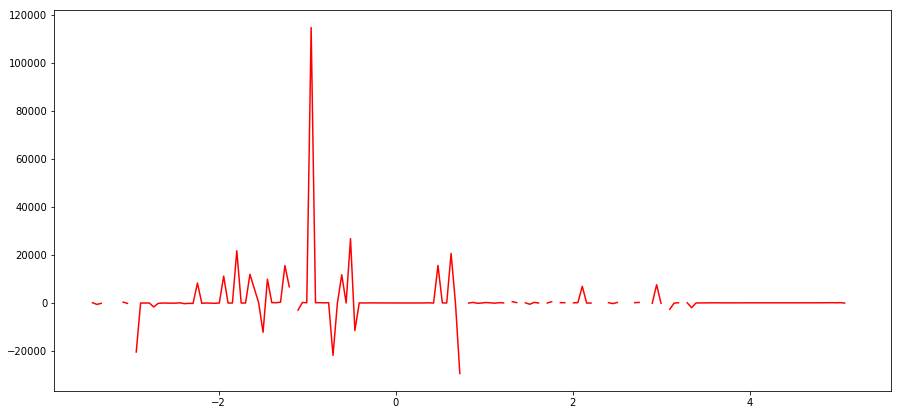

In [63]:
#plotting overlay of masked velocity values,verification

plt.figure(figsize = (15,7))
plt.plot(distances_sections,y_axis_Gvelocity_crazyerrmasked,color='r')

(112000, 117000)

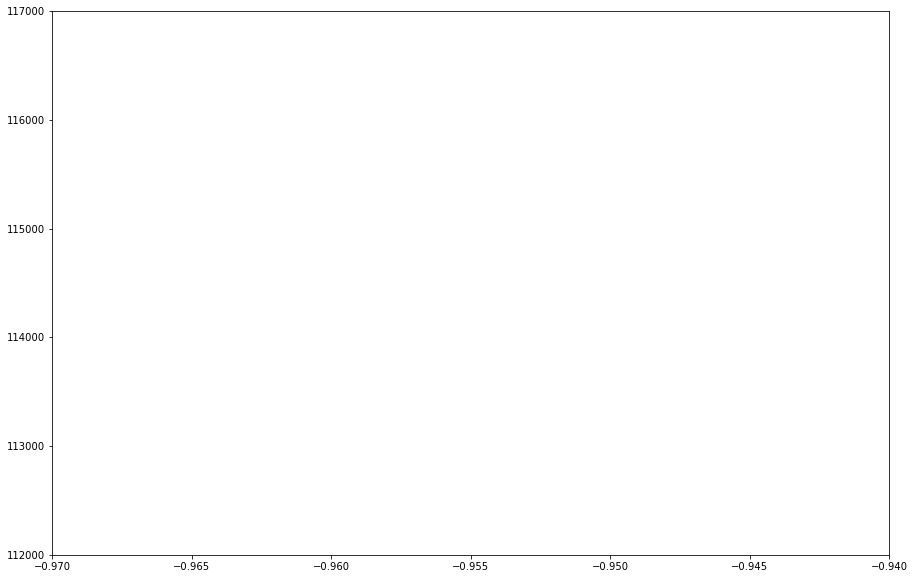

In [77]:
plt.figure(figsize=(15,10))
plt.errorbar(arr(distances_sections * u.kpc), arr(y_axis_Gvelocity), yerr=arr(v_unc[0]),ecolor='cyan')
plt.xlim(-0.97,-0.94)
plt.ylim(112000,117000)
#plt.xlim(np.min(arr(distances_sections * u.kpc)), 4)

<Container object of 3 artists>

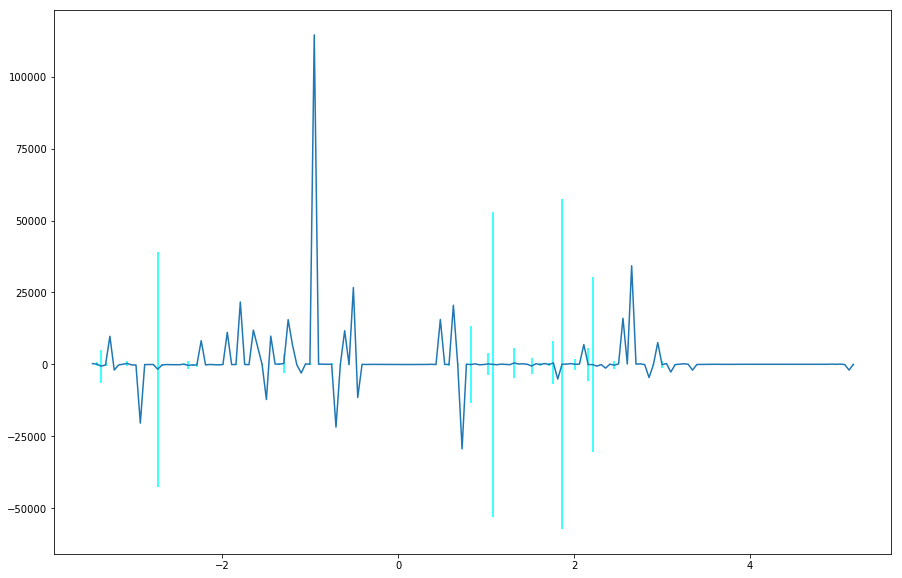

In [65]:
plt.figure(figsize=(15,10))
plt.errorbar(arr(distances_sections * u.kpc), arr(y_axis_Gvelocity), yerr=arr(v_unc_realistic),ecolor='cyan')

# Removing BAD gaussian fits from data

In [66]:
#plotting where bad gaussian fits are as determined by a bad matrix out
new_y_axis_Gvelocity = []
for index in badvalues:
    y_axis_Gvelocity[index] = np.nan
    new_y_axis_Gvelocity = y_axis_Gvelocity
#for i in new_y_axis_Gvelocity:
#    print(i)

<Container object of 3 artists>

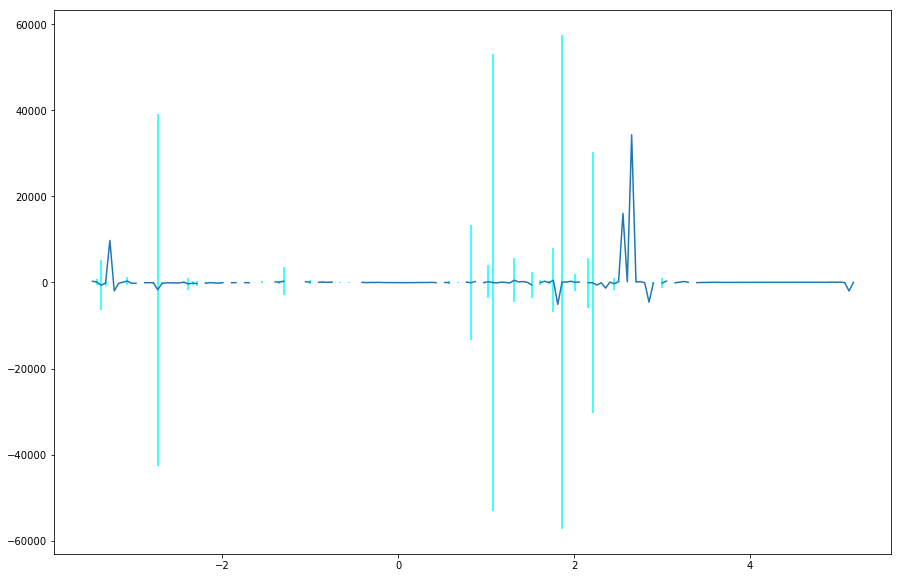

In [67]:
plt.figure(figsize=(15,10))
plt.errorbar(arr(distances_sections * u.kpc), arr(new_y_axis_Gvelocity), yerr=arr(v_unc_realistic),ecolor='cyan')

Model: eriksmodel
Inputs: ('r',)
Outputs: ('r',)
Model set size: 1
Parameters:
    alpha  beta sigma omega
    ----- ----- ----- -----
    0.001 0.001 250.0   0.4


(-2000, 2000)

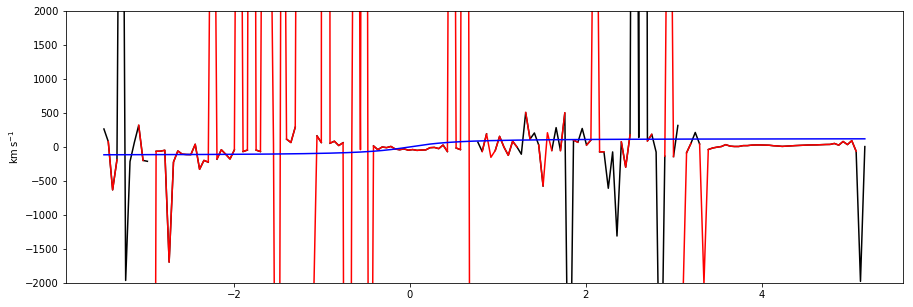

In [68]:
#eriks model eqt 5

@custom_model #very necessary line
def eriksmodel(r, alpha=.001, beta=.001, sigma=250, omega=.4):
    return (r * ((alpha + beta)/2) + (sigma - r*(alpha - beta)) * (np.arctan(r / omega))/np.pi)



#fit model to data
m_init = eriksmodel()
fit = LevMarLSQFitter()
#print('here',m_init)
m = fit(m_init, arr(distances_sections * u.kpc), arr(y_axis_Gvelocity),weights=arr(1/(v_unc[0])**2))
print(m)
#plot data & fit
plt.figure(figsize=(15,5))
########################################################################
plt.plot(distances_sections, y_axis_Gvelocity, color='k')
plt.plot(distances_sections,y_axis_Gvelocity_crazyerrmasked,color='r')
########################################################################
plt.plot(distances_sections, m(distances_sections), color='b')
plt.ylim(-2000,2000)
#plt.ylim(-500,500) #zooms to see data good, if fit is good
#plt.ylim(-20000,20000) #to see whole effect of param playing on fit line

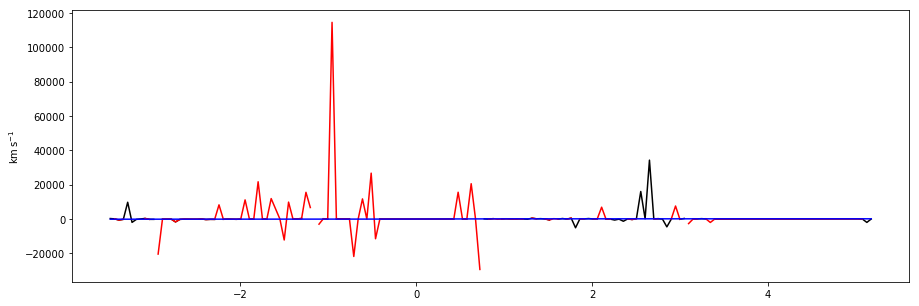

In [69]:
plt.figure(figsize=(15,5))
########################################################################
plt.plot(distances_sections, y_axis_Gvelocity, color='k')
plt.plot(distances_sections,y_axis_Gvelocity_crazyerrmasked,color='r')
########################################################################
plt.plot(distances_sections, m(distances_sections), color='b')
#plt.ylim(-2000,2000)

(-20000, 20000)

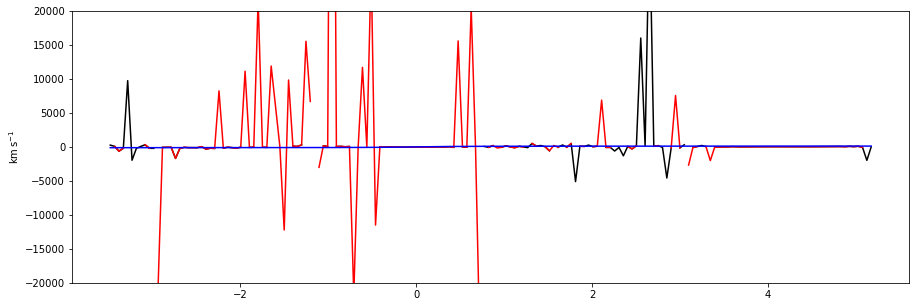

In [70]:
plt.figure(figsize=(15,5))
########################################################################
plt.plot(distances_sections, y_axis_Gvelocity, color='k')
plt.plot(distances_sections,y_axis_Gvelocity_crazyerrmasked,color='r')
########################################################################
plt.plot(distances_sections, m(distances_sections), color='b')
plt.ylim(-20000,20000) #to see whole effect of param playing on fit line

(-500, 500)

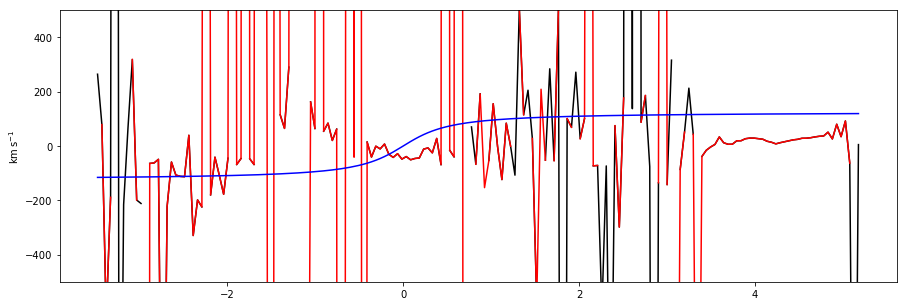

In [71]:
plt.figure(figsize=(15,5))
########################################################################
plt.plot(distances_sections, y_axis_Gvelocity, color='k')
plt.plot(distances_sections,y_axis_Gvelocity_crazyerrmasked,color='r')
########################################################################
plt.plot(distances_sections, m(distances_sections), color='b')
plt.ylim(-500,500)

## BLUE side

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


4 target files located


choose 2D spec for blueside
choose 1D target spec axis limits for blueside


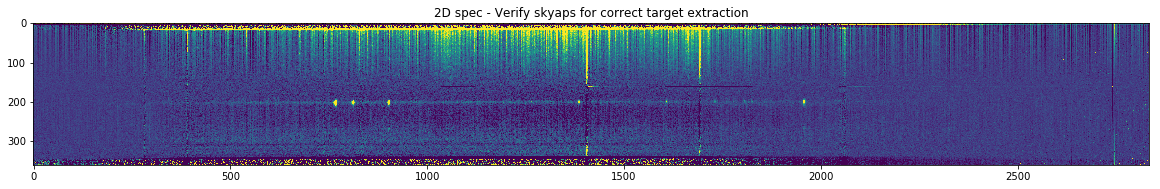

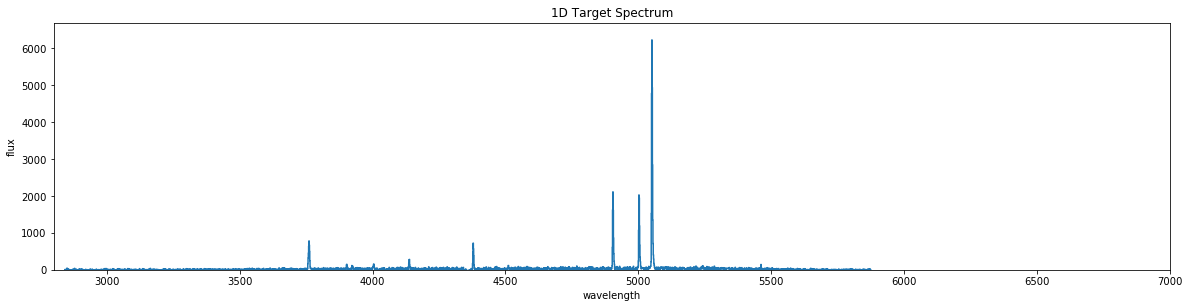

In [72]:
targetID113_blue10 = 'AnaK_1pa2'
skyaps113_blue10 = [(140,190),(305,340)]#[(150,270),(305,400)]--works with poly2#[(50,115),(185,320)]
specaps113=(195,210)#(275,300) #####(255,310)#gets both emission line wiggles
#242-265
flux_blue10_AK1_113,unc_113,comb_113 = pipeline.sky_subtract(targetID113_blue10,skyaps113_blue10,ds_blue10,all_side_files_blue10,atlasfiles_blue10,all_side_files_target_blue,flatid,specaps113,vmax,vmin,model_blue)



In [73]:
#isolates the sky-subtracted 2D spectrum

#choose best emission line side
##############################################
best_emission_comb = comb_113
best_emission_skyaps = skyaps113_blue10
best_emission_model = model_blue
##############################################

#sky-subtracting 2D
subimg2, comb2, fitmodels = sky_subtract2D(best_emission_comb, best_emission_skyaps, best_emission_model)
#subimg2 is sky-subtracted, instumentation noise subtracted, stacked data
#comb2 is original instrumentation noise subtracted, stacked data
#fitmodels is sky lines fitted to 'model' type

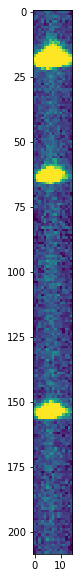

In [74]:
#PART TWO ----------------------determining best emission line pixel range

#using FULL ccd pixel range
################################################################
testingthis=subimg2.data[750:959,195:210] #[space,wl]for RED [wl,space]for BLUE
#conclusions
bestline_range_fullccd = (1396, 1409)
bestline_range_correction = (1386,1399) 
#################################################################

vmin=-10
vmax=45
plt.figure(figsize=(10,10))
plt.imshow(testingthis,vmin=vmin,vmax=vmax)#add in ,aspect='auto', to get square pixels

# AnaK-2

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


3 target files located


choose 2D spec for redside
choose 1D target spec axis limits for redside


(-200, 1000)

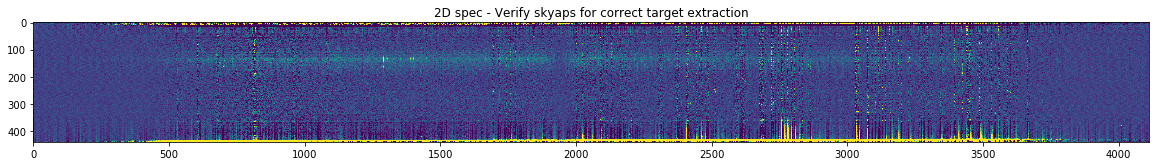

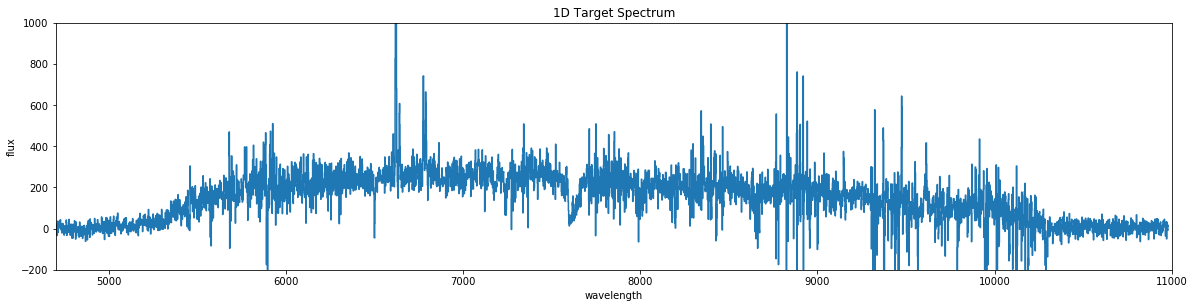

In [75]:
#1.0" frames 95-97
targetID_red10 = 'AnaK_2'
skyaps_red10 = [(50,100),(195,350)]
all_side_files_target='DoubleSpec/20151108/red*.fits'
flatid='DomeFlats 1p0'
specaps=(110,160) 
vmax=40
vmin=-10
model= ('poly',3)#'linear'
flux_red10_AK2,unc,comb = pipeline.sky_subtract(targetID_red10,skyaps_red10,ds_red10,all_side_files_red10,atlasfiles_red10,all_side_files_target,flatid,specaps,vmax,vmin,model)
plt.ylim(-200,1000)